# Imports and Versions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import sklearn

import cas_ads_m3_library as cas

2022-11-22 20:50:01.997312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 20:50:02.114158: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-22 20:50:02.114182: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-22 20:50:02.719327: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
print(f"pandas {pd.__version__}")
print(f"numpy {np.__version__}")
print(f"matplotlib {matplotlib.__version__}")
print(f"tsklearn: {sklearn.__version__}")
print(f"tensorflow: {tf.__version__}")

pandas 1.5.1
numpy 1.23.4
matplotlib 3.6.2
tsklearn: 1.1.3
tensorflow: 2.11.0-dev20220927


## Read the source file

In [4]:
# read the source file 
raw_df = pd.read_excel("colums_list.xlsx", sheet_name="Eingabe", skiprows=17)

set the header names

In [5]:
# set header names
raw_df.columns = ["Ort", "Projektname", "Datum", "Bezeichnung", "Stahlbetonstütze", "Stahlbetonverbundstütze",
                  "rund", "eckig", "oval", "d", "a", "b", "l", "Nd", "Md", "Stück", "Hersteller", 
                  "Einkauf_LoMa", "Einkauf_Baumeister", "LoMa", "Rabatt inkl. Skonto LoMa",
                  "Transport", "Stückpreis", "Baumeister", "Rabatt inkl. Skonto Baumeister",
                  "Baumeister inkl. Rabatt & Teuerung", "A", "V", "N/mm2", "CHF/m3","Teuerung",
                  "Total Preis", "Bemerkungen"]


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3447 entries, 0 to 3446
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Ort                                 0 non-null      float64       
 1   Projektname                         0 non-null      float64       
 2   Datum                               3447 non-null   datetime64[ns]
 3   Bezeichnung                         0 non-null      float64       
 4   Stahlbetonstütze                    3312 non-null   object        
 5   Stahlbetonverbundstütze             135 non-null    object        
 6   rund                                724 non-null    object        
 7   eckig                               2373 non-null   object        
 8   oval                                253 non-null    object        
 9   d                                   724 non-null    float64       
 10  a                       

## Looking for entry errors and clean the data

load: 0 < Nd <15000 <br>
bending moment: Md < 50 <br>
diameter: 0.1 < d < 0.5 <br>
width: 0.1 < a < 1 <br>
length: 0.1 < b  < 1  <br>
column length: 2 < l < 15 <br>

In [7]:
raw_df[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,3447.000000,98.000000,724.000000,2626.000000,2626.00000,3447.000000,3447.000000,3447.000000,3447.000000
mean,2846.215260,41.303061,0.271441,0.276657,0.39781,0.103144,0.352942,3.325658,869.904077
std,2918.532948,74.448617,0.090735,0.069834,0.16867,0.063673,0.265259,1.000373,614.905497
min,-370.000000,0.100000,0.133000,0.100000,0.15000,0.013893,0.030975,0.277000,111.891000
25%,1055.500000,1.000000,0.200000,0.220000,0.30000,0.062500,0.188024,2.667500,508.194500
50%,2100.000000,1.000000,0.250000,0.300000,0.35000,0.090000,0.294300,3.100000,704.600000
75%,3800.000000,70.000000,0.300000,0.300000,0.50000,0.127500,0.428400,3.560000,992.132900
max,89960.000000,450.000000,0.675000,0.600000,3.00000,0.900000,3.159000,9.140000,6551.896000


In [8]:
#drop...

df = raw_df.drop(raw_df[(raw_df.Nd < 0)].index)
df = df.drop(df[(df.Nd > 15000)].index)
df = df.drop(df[(df.Md > 50)].index)
df = df.drop(df[(df.Md < -50)].index)
df = df.drop(df[(df.d > 0.5)].index)
df = df.drop(df[(df.d < 0.1)].index)
df = df.drop(df[(df.a > 1.0)].index)
df = df.drop(df[(df.a < 0.1)].index)
df = df.drop(df[(df.b > 1.0)].index)
df = df.drop(df[(df.b < 0.1)].index)
df = df.drop(df[(df.l > 15.0)].index)
df = df.drop(df[(df.l < 2.0)].index)


df.describe()

,Ort,Projektname,Bezeichnung,d,a,b,l,Nd,Md,Stück,...,Stückpreis,Baumeister,Rabatt inkl. Skonto Baumeister,Baumeister inkl. Rabatt & Teuerung,A,V,N/mm2,CHF/m3,Teuerung,Total Preis
count,0.0,0.0,0.0,704.000000,2578.000000,2578.000000,3379.000000,3379.000000,69.000000,3379.000000,...,3379.000000,0.0,0.0,0.0,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000
mean,NaN,NaN,NaN,0.265978,0.276171,0.392459,3.337354,2757.172536,8.007246,4.012430,...,865.349963,NaN,NaN,NaN,0.101129,0.348264,27.298984,3197.689171,0.300163,3003.220164
std,NaN,NaN,NaN,0.081274,0.068826,0.152161,1.000562,2373.804582,15.188640,12.377397,...,613.471353,NaN,NaN,NaN,0.059225,0.256711,16.597595,2559.816648,0.001266,8197.977538
min,NaN,NaN,NaN,0.133000,0.100000,0.150000,2.060000,1.000000,1.000000,1.000000,...,111.891000,NaN,NaN,NaN,0.013893,0.030975,0.008000,243.241304,0.300000,269.421240
25%,NaN,NaN,NaN,0.200000,0.220000,0.300000,2.685000,1050.000000,1.000000,1.000000,...,507.000000,NaN,NaN,NaN,0.062500,0.186611,14.917778,1810.139039,0.300000,679.378134
50%,NaN,NaN,NaN,0.250000,0.300000,0.350000,3.100000,2083.000000,1.000000,1.000000,...,702.940000,NaN,NaN,NaN,0.090000,0.292500,25.000000,2464.472050,0.300000,1124.320000
75%,NaN,NaN,NaN,0.300000,0.300000,0.500000,3.570000,3767.000000,1.000000,3.000000,...,985.040606,NaN,NaN,NaN,0.125664,0.424800,36.966667,3541.139098,0.300000,2528.500000
max,NaN,NaN,NaN,0.500000,0.600000,1.000000,9.140000,15000.000000,50.000000,444.000000,...,6551.896000,NaN,NaN,NaN,0.375000,2.635500,140.563328,22742.963028,0.310000,266850.592355


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 3446
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Ort                                 0 non-null      float64       
 1   Projektname                         0 non-null      float64       
 2   Datum                               3379 non-null   datetime64[ns]
 3   Bezeichnung                         0 non-null      float64       
 4   Stahlbetonstütze                    3244 non-null   object        
 5   Stahlbetonverbundstütze             135 non-null    object        
 6   rund                                704 non-null    object        
 7   eckig                               2326 non-null   object        
 8   oval                                252 non-null    object        
 9   d                                   704 non-null    float64       
 10  a                       

# Descriptive Statistics

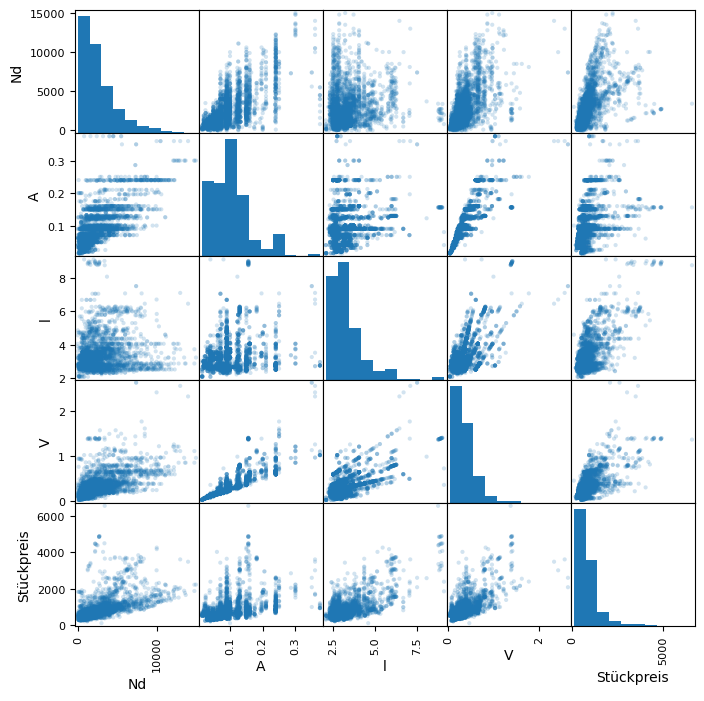

In [10]:
sub_df = df[["Nd", "A", "l", "V", "Stückpreis"]]

from pandas.plotting import scatter_matrix

scatter_matrix(sub_df, alpha=0.2, figsize=(8, 8), diagonal="hist")
# plt.savefig('scatter_matrix_df.png', dpi=300)  # save plot, befor showing
plt.show()

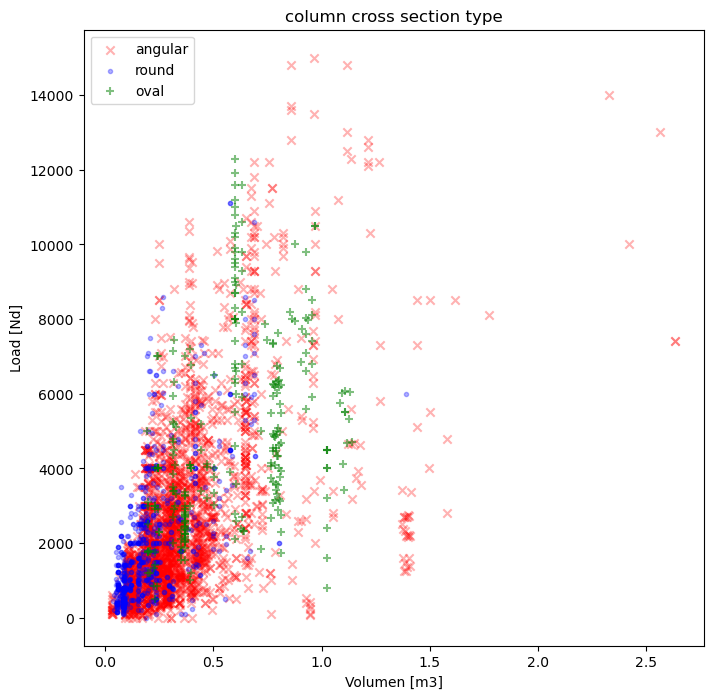

In [11]:
rund = df[df["rund"] == "x"]
eckig = df[df["eckig"] == "x"]
oval = df[df["oval"] == "x"]

plt.figure(figsize=(8, 8))

plt.scatter(eckig["V"], eckig["Nd"], marker="x", alpha=0.3, c="r", label="angular")
plt.scatter(rund["V"], rund["Nd"], marker=".", alpha=0.3, c="b", label="round")
plt.scatter(oval["V"], oval["Nd"], marker="+", alpha=0.5, c="g", label="oval")
plt.title("column cross section type")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_cs_tpyes.png', dpi=300)
plt.show()

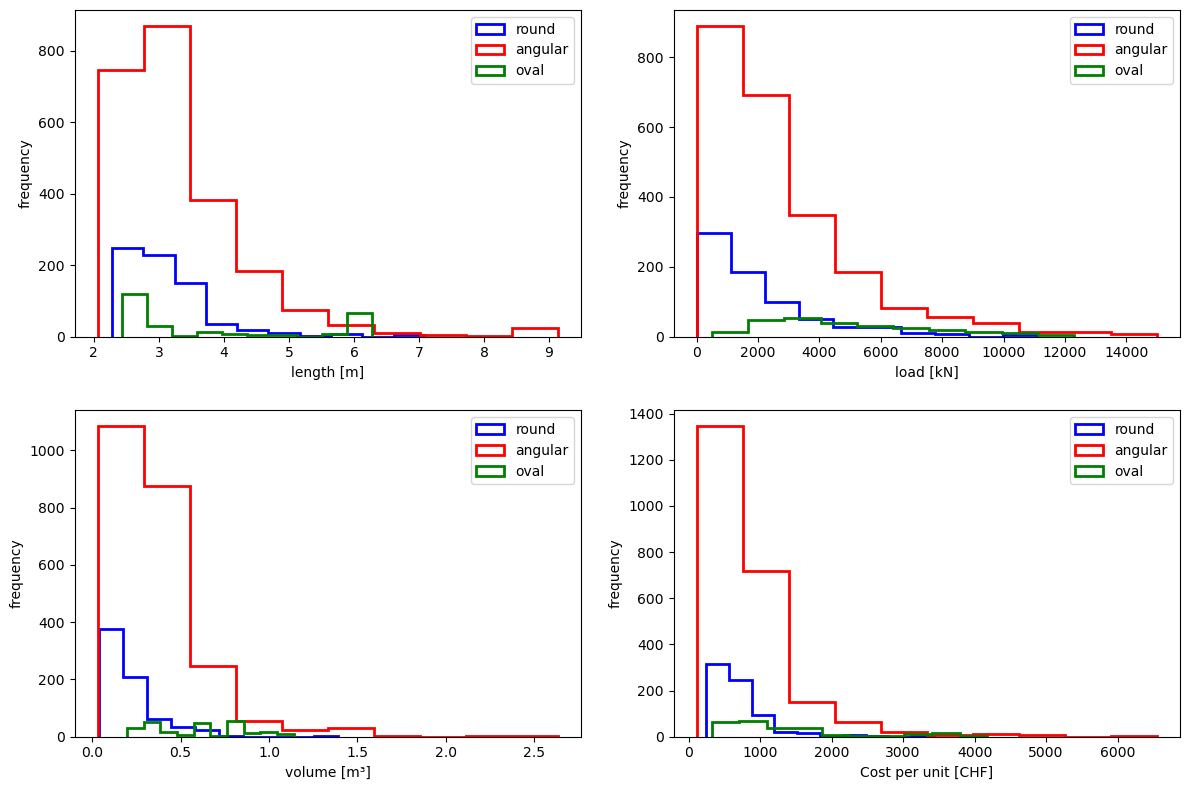

In [12]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(rund["l"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["l"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["l"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("length [m]")
plt.ylabel("frequency")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(rund["Nd"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["Nd"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["Nd"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("load [kN]")
plt.ylabel("frequency")
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(rund["V"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["V"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["V"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("volume [m³]")
plt.ylabel("frequency")
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(rund["Stückpreis"], color="b", histtype="step", linewidth=2, label="round")
plt.hist(eckig["Stückpreis"], color="r", histtype="step", linewidth=2 ,label="angular")
plt.hist(oval["Stückpreis"], color="g", histtype="step", linewidth=2, label="oval")
plt.xlabel("Cost per unit [CHF]")
plt.ylabel("frequency")
plt.legend()

plt.tight_layout(h_pad=2, w_pad=2)
plt.legend()
# plt.savefig('histograms.png', dpi=300)
plt.show()

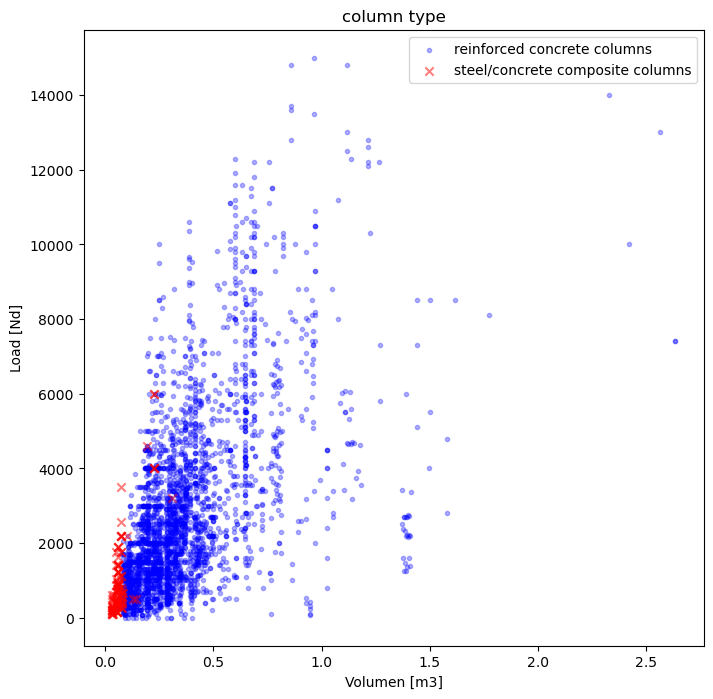

In [13]:
sbv = df[df["Stahlbetonverbundstütze"] == "x"]
sb = df[df["Stahlbetonstütze"] == "x"]


plt.figure(figsize=(8, 8))


plt.scatter(sb["V"], sb["Nd"], marker=".", alpha=0.3, c="b", label="reinforced concrete columns")
plt.scatter(sbv["V"], sbv["Nd"], marker="x", alpha=0.5, c="r", label="steel/concrete composite columns")

plt.title("column type")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_column_tpyes.png', dpi=300)
plt.show()

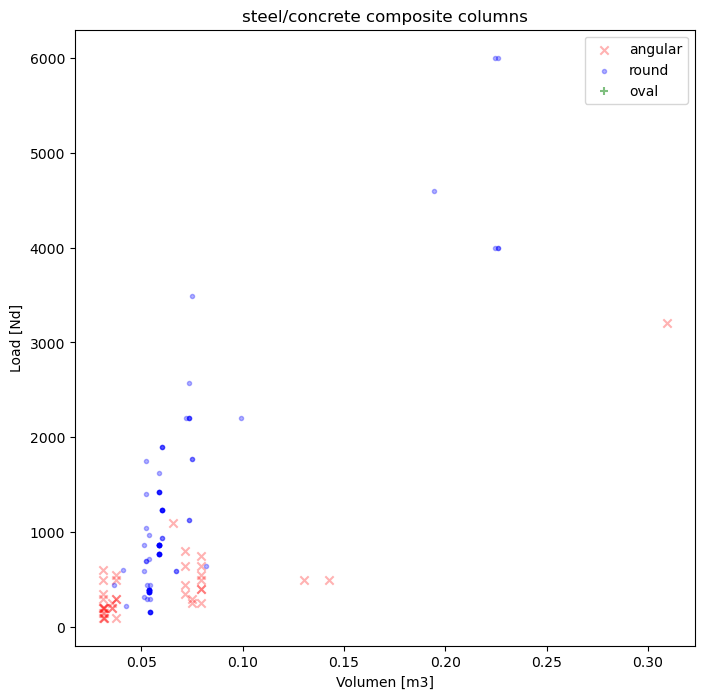

In [14]:
sbv_rund = sbv[sbv["rund"] == "x"]
sbv_eckig = sbv[sbv["eckig"] == "x"]
sbv_oval = sbv[sbv["oval"] == "x"]

plt.figure(figsize=(8, 8))

plt.scatter(sbv_eckig["V"], sbv_eckig["Nd"], marker="x", alpha=0.3, c="r", label="angular")
plt.scatter(sbv_rund["V"], sbv_rund["Nd"], marker=".", alpha=0.3, c="b", label="round")
plt.scatter(sbv_oval["V"], sbv_oval["Nd"], marker="+", alpha=0.5, c="g", label="oval")
plt.title("steel/concrete composite columns")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_sbv_cs_tpyes.png', dpi=300)
plt.show()

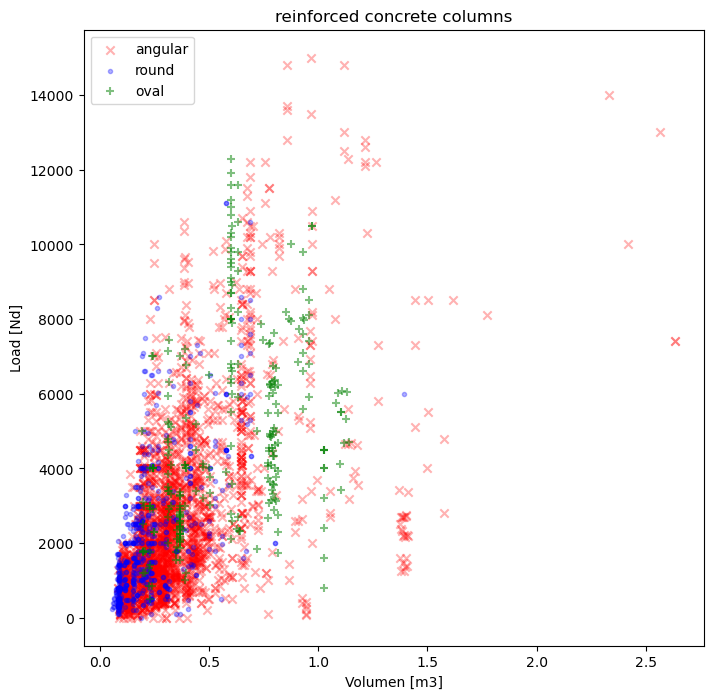

In [15]:
sb_rund = sb[sb["rund"] == "x"]
sb_eckig = sb[sb["eckig"] == "x"]
sb_oval = sb[sb["oval"] == "x"]

plt.figure(figsize=(8, 8))

plt.scatter(sb_eckig["V"], sb_eckig["Nd"], marker="x", alpha=0.3, c="r", label="angular")
plt.scatter(sb_rund["V"], sb_rund["Nd"], marker=".", alpha=0.3, c="b", label="round")
plt.scatter(sb_oval["V"], sb_oval["Nd"], marker="+", alpha=0.5, c="g", label="oval")
plt.title("reinforced concrete columns")
plt.xlabel("Volumen [m3]")
plt.ylabel("Load [Nd]")
plt.legend()
# plt.savefig('scatter_tpyes.png', dpi=300)
plt.show()

# Modelling

## all data, no filtering

### Linear model

In [16]:
x = df[["Nd", "A", "V", "l"]]
y = df[["Stückpreis"]]

In [17]:
x_train, x_test, y_train, y_test = cas.create_test_train_set(x, y)

In [18]:
LM = cas.LinearModel()
LMmodel = LM.linear_model(x_train, y_train)
print("MSE:")
print(f"Train: {LM.mse(x_train, y_train, LMmodel):0.0f}")
print(f"Test: {LM.mse(x_test, y_test, LMmodel):0.0f}")
print("\nR2:")
print(f"Train: {LM.r2(x_train, y_train, LMmodel):0.4f}")
print(f"Test: {LM.r2(x_test, y_test, LMmodel):0.4f}")

# LMmodel.intercept_
# LMmodel.coef_
print(f"\nIntercept: {LMmodel.intercept_[0]:0.4f}")
print(f"Coeficent Nd: {LMmodel.coef_[0][0]:0.4f}")
print(f"Coeficent A: {LMmodel.coef_[0][1]:0.4f}")
print(f"Coeficent V: {LMmodel.coef_[0][2]:0.4f}")
print(f"Coeficent l: {LMmodel.coef_[0][3]:0.4f}")

MSE:
Train: 329
Test: 341

R2:
Train: 0.7095
Test: 0.7000

Intercept: -73.1459
Coeficent Nd: 0.1329
Coeficent A: -5612.4360
Coeficent V: 1573.7831
Coeficent l: 178.0693


### Linear Regression with the statsmodels module

In [19]:
import statsmodels.api as sm


X2 = sm.add_constant(x_train) # make sure that the model has an intercept
# est = sm.OLS(formula="volume ~ diam * height**2", endog=y, exog=x)
est = sm.OLS(y_train, X2) # run OLS
model = est.fit()

model.params # print model parameters

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Stückpreis   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:50:08   Log-Likelihood:                -19504.
No. Observations:                2703   AIC:                         3.902e+04
Df Residuals:                    2698   BIC:                         3.905e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.1459     51.070     -1.432      0.1

In [20]:
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
#plt.style.use('seaborn') # pretty matplotlib plots

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]


  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y, data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_sq_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y.iloc[i],
                                     model_norm_residuals_abs_sqrt[i]));

  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');


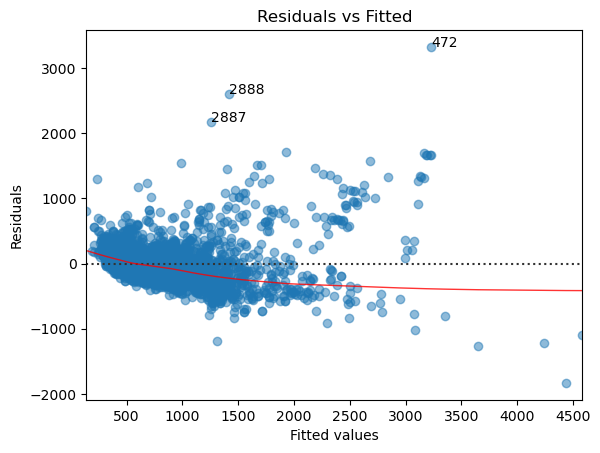

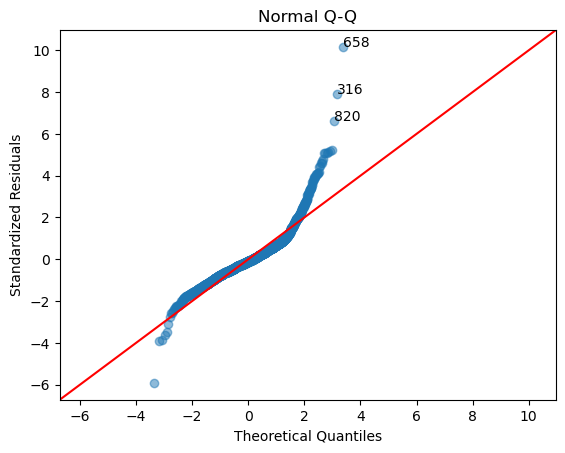

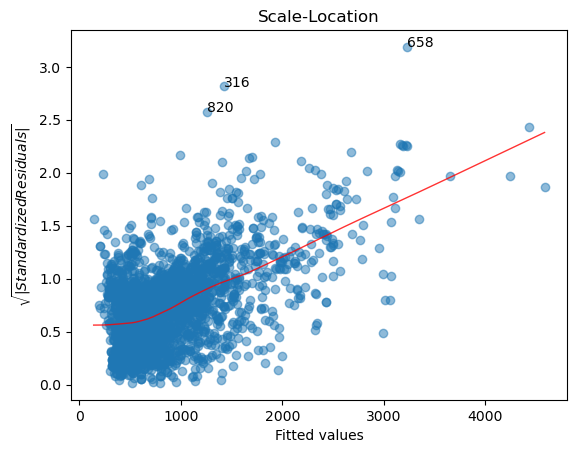

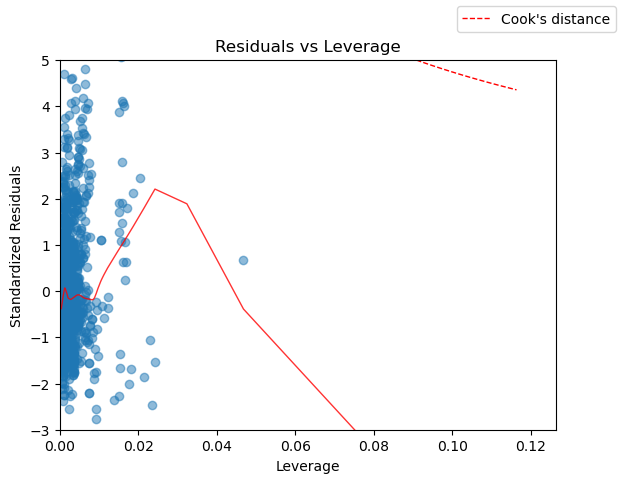

In [21]:
diagnostic_plots(x_train,y_train)

### Neural Network

In [22]:
xnn = x.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
ynn = y.mul({"Stückpreis": 1/10000})

In [23]:
xnn_train, xnn_test, ynn_train, ynn_test = cas.create_test_train_set(xnn, ynn)

In [24]:
NN = cas.NeuralNetwork()
NNmodel = NN.creat_network(4)

2022-11-22 20:50:09.737570: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-22 20:50:09.737593: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-22 20:50:09.737614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tweety): /proc/driver/nvidia/version does not exist
2022-11-22 20:50:09.737840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
hist = NN.fit_model(NNmodel, xnn_train, ynn_train, xnn_test, ynn_test)

Epoch 1/256
85/85 [==============================] - 1s 4ms/step - loss: 0.0025 - r_square: 0.3750 - val_loss: 7.7686e-04 - val_r_square: 0.7273
Epoch 2/256
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7287 - val_loss: 6.5137e-04 - val_r_square: 0.7713
Epoch 3/256
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7323 - val_loss: 0.0016 - val_r_square: 0.4493
Epoch 4/256
85/85 [==============================] - 0s 2ms/step - loss: 9.8768e-04 - r_square: 0.7522 - val_loss: 6.0686e-04 - val_r_square: 0.7870
Epoch 5/256
85/85 [==============================] - 0s 2ms/step - loss: 8.5855e-04 - r_square: 0.7846 - val_loss: 6.0412e-04 - val_r_square: 0.7879
Epoch 6/256
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7425 - val_loss: 6.2963e-04 - val_r_square: 0.7790
Epoch 7/256
85/85 [==============================] - 0s 2ms/step - loss: 8.9990e-04 - r_square: 0.7742 - val_loss: 5.6942e-04 

Epoch 56/256
85/85 [==============================] - 0s 2ms/step - loss: 6.2133e-04 - r_square: 0.8441 - val_loss: 8.3058e-04 - val_r_square: 0.7084
Epoch 57/256
85/85 [==============================] - 0s 2ms/step - loss: 6.0502e-04 - r_square: 0.8482 - val_loss: 5.1814e-04 - val_r_square: 0.8181
Epoch 58/256
85/85 [==============================] - 0s 2ms/step - loss: 5.8195e-04 - r_square: 0.8540 - val_loss: 8.9944e-04 - val_r_square: 0.6843
Epoch 59/256
85/85 [==============================] - 0s 2ms/step - loss: 6.1301e-04 - r_square: 0.8462 - val_loss: 5.3420e-04 - val_r_square: 0.8125
Epoch 60/256
85/85 [==============================] - 0s 2ms/step - loss: 5.7926e-04 - r_square: 0.8547 - val_loss: 5.2033e-04 - val_r_square: 0.8173
Epoch 61/256
85/85 [==============================] - 0s 2ms/step - loss: 6.0270e-04 - r_square: 0.8488 - val_loss: 4.9954e-04 - val_r_square: 0.8246
Epoch 62/256
85/85 [==============================] - 0s 2ms/step - loss: 5.2877e-04 - r_square: 0.8

85/85 [==============================] - 0s 2ms/step - loss: 5.6091e-04 - r_square: 0.8593 - val_loss: 5.9262e-04 - val_r_square: 0.7920
Epoch 111/256
85/85 [==============================] - 0s 2ms/step - loss: 5.1933e-04 - r_square: 0.8697 - val_loss: 5.6181e-04 - val_r_square: 0.8028
Epoch 112/256
85/85 [==============================] - 0s 2ms/step - loss: 4.7023e-04 - r_square: 0.8820 - val_loss: 5.6048e-04 - val_r_square: 0.8032
Epoch 113/256
85/85 [==============================] - 0s 2ms/step - loss: 4.9195e-04 - r_square: 0.8766 - val_loss: 5.1983e-04 - val_r_square: 0.8175
Epoch 114/256
85/85 [==============================] - 0s 2ms/step - loss: 5.0203e-04 - r_square: 0.8740 - val_loss: 4.9409e-04 - val_r_square: 0.8266
Epoch 115/256
85/85 [==============================] - 0s 2ms/step - loss: 5.2568e-04 - r_square: 0.8681 - val_loss: 5.7733e-04 - val_r_square: 0.7973
Epoch 116/256
85/85 [==============================] - 0s 2ms/step - loss: 5.3603e-04 - r_square: 0.8655 - v

85/85 [==============================] - 0s 2ms/step - loss: 4.8574e-04 - r_square: 0.8781 - val_loss: 4.8990e-04 - val_r_square: 0.8280
Epoch 165/256
85/85 [==============================] - 0s 1ms/step - loss: 4.8890e-04 - r_square: 0.8773 - val_loss: 5.3840e-04 - val_r_square: 0.8110
Epoch 166/256
85/85 [==============================] - 0s 2ms/step - loss: 4.8601e-04 - r_square: 0.8781 - val_loss: 7.2800e-04 - val_r_square: 0.7444
Epoch 167/256
85/85 [==============================] - 0s 2ms/step - loss: 5.2304e-04 - r_square: 0.8688 - val_loss: 6.4679e-04 - val_r_square: 0.7729
Epoch 168/256
85/85 [==============================] - 0s 2ms/step - loss: 5.0421e-04 - r_square: 0.8735 - val_loss: 5.0963e-04 - val_r_square: 0.8211
Epoch 169/256
85/85 [==============================] - 0s 2ms/step - loss: 4.4617e-04 - r_square: 0.8881 - val_loss: 7.3006e-04 - val_r_square: 0.7437
Epoch 170/256
85/85 [==============================] - 0s 2ms/step - loss: 6.2874e-04 - r_square: 0.8423 - v

85/85 [==============================] - 0s 2ms/step - loss: 4.7186e-04 - r_square: 0.8816 - val_loss: 6.0476e-04 - val_r_square: 0.7877
Epoch 219/256
85/85 [==============================] - 0s 2ms/step - loss: 4.9705e-04 - r_square: 0.8753 - val_loss: 5.2791e-04 - val_r_square: 0.8147
Epoch 220/256
85/85 [==============================] - 0s 2ms/step - loss: 5.4669e-04 - r_square: 0.8628 - val_loss: 4.8066e-04 - val_r_square: 0.8313
Epoch 221/256
85/85 [==============================] - 0s 2ms/step - loss: 4.3564e-04 - r_square: 0.8907 - val_loss: 5.5564e-04 - val_r_square: 0.8049
Epoch 222/256
85/85 [==============================] - 0s 2ms/step - loss: 4.5965e-04 - r_square: 0.8847 - val_loss: 5.0927e-04 - val_r_square: 0.8212
Epoch 223/256
85/85 [==============================] - 0s 2ms/step - loss: 5.3661e-04 - r_square: 0.8654 - val_loss: 6.4590e-04 - val_r_square: 0.7733
Epoch 224/256
85/85 [==============================] - 0s 2ms/step - loss: 4.3574e-04 - r_square: 0.8907 - v

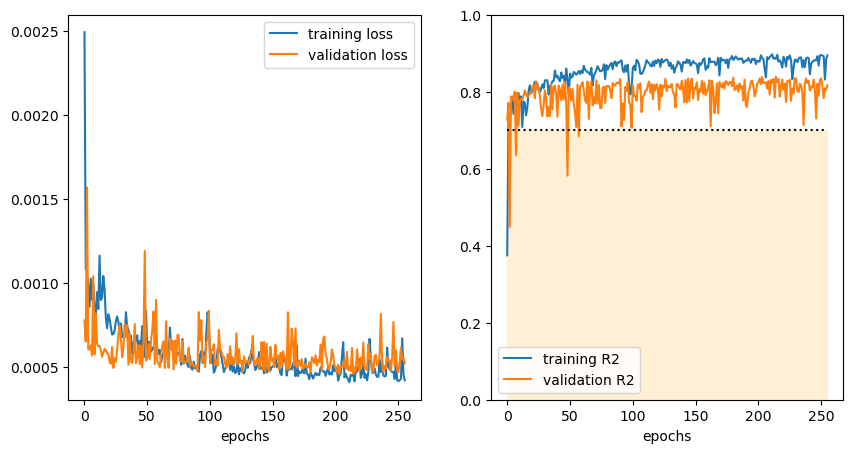

In [26]:
NN.show_learning_plots(hist)

In [27]:
NN.evaluate(xnn_test, ynn_test, NNmodel)

22/22 - 0s - loss: 5.2199e-04 - r_square: 0.8168 - 36ms/epoch - 2ms/step


In [28]:
xin = np.array([[2500/10000, .25*.25*10, .25*.25*3, 3/10]])
print(f"{NN.predict(NNmodel, xin)[0][0]*10000:0.0f}")

1/1 [==============================] - 0s 79ms/step
718


## steel/concrete compound colums

### Linear Regression

In [29]:
sbv[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,135.000000,0.0,97.000000,38.000000,38.000000,135.000000,135.000000,135.000000,135.000000
mean,960.962963,NaN,0.169953,0.113684,0.176579,0.022808,0.066607,2.822741,827.490830
std,1051.291937,NaN,0.034736,0.021235,0.036114,0.011529,0.043091,0.395626,484.465781
min,100.000000,NaN,0.133000,0.100000,0.150000,0.013893,0.030975,2.065000,512.343000
25%,370.000000,NaN,0.159000,0.100000,0.150000,0.019856,0.053312,2.685000,568.893000
50%,650.000000,NaN,0.159000,0.100000,0.150000,0.019856,0.058773,2.880000,663.000000
75%,1130.000000,NaN,0.159000,0.120000,0.200000,0.024000,0.069403,2.980000,897.000000
max,6000.000000,NaN,0.300000,0.200000,0.300000,0.070686,0.309300,5.155000,4024.800000


In [30]:
sbvx = sbv[["Nd", "A", "V", "l"]]
sbvy = sbv[["Stückpreis"]]

In [31]:
sbvx_train, sbvx_test, sbvy_train, sbvy_test = cas.create_test_train_set(sbvx, sbvy)

In [32]:
sbvLM = cas.LinearModel()
sbvLMmodel = sbvLM.linear_model(sbvx_train, sbvy_train)
print("MSE:")
print(f"Train: {sbvLM.mse(sbvx_train, sbvy_train, sbvLMmodel):0.0f}")
print(f"Test: {sbvLM.mse(sbvx_test, sbvy_test, sbvLMmodel):0.0f}")
print("\nR2:")
print(f"Train: {sbvLM.r2(sbvx_train, sbvy_train, sbvLMmodel):0.4f}")
print(f"Test: {sbvLM.r2(sbvx_test, sbvy_test, sbvLMmodel):0.4f}")

MSE:
Train: 216
Test: 337

R2:
Train: 0.8145
Test: 0.1693


### Neural Network

In [33]:
sbvxnn = sbvx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sbvynn = sbvy.mul({"Stückpreis": 1/10000})

In [34]:
sbvxnn_train, sbvxnn_test, sbvynn_train, sbvynn_test = cas.create_test_train_set(sbvxnn, sbvynn)

In [35]:
sbvNN = cas.NeuralNetwork()
sbvNNmodel = sbvNN.creat_network(4)

In [36]:
sbvhist = sbvNN.fit_model(sbvNNmodel, sbvxnn_train, sbvynn_train, sbvxnn_test, sbvynn_test)

Epoch 1/256
4/4 [==============================] - 1s 58ms/step - loss: 0.0104 - r_square: -6.2326 - val_loss: 0.0128 - val_r_square: -1.2394
Epoch 2/256
4/4 [==============================] - 0s 14ms/step - loss: 0.0044 - r_square: -2.0423 - val_loss: 0.0042 - val_r_square: 0.2600
Epoch 3/256
4/4 [==============================] - 0s 18ms/step - loss: 0.0022 - r_square: -0.5403 - val_loss: 0.0045 - val_r_square: 0.2042
Epoch 4/256
4/4 [==============================] - 0s 15ms/step - loss: 0.0012 - r_square: 0.1338 - val_loss: 0.0059 - val_r_square: -0.0331
Epoch 5/256
4/4 [==============================] - 0s 15ms/step - loss: 0.0012 - r_square: 0.1642 - val_loss: 0.0039 - val_r_square: 0.3089
Epoch 6/256
4/4 [==============================] - 0s 15ms/step - loss: 0.0011 - r_square: 0.2407 - val_loss: 0.0043 - val_r_square: 0.2488
Epoch 7/256
4/4 [==============================] - 0s 15ms/step - loss: 9.6512e-04 - r_square: 0.3280 - val_loss: 0.0040 - val_r_square: 0.3066
Epoch 8/256

Epoch 58/256
4/4 [==============================] - 0s 14ms/step - loss: 5.5610e-04 - r_square: 0.6128 - val_loss: 0.0016 - val_r_square: 0.7253
Epoch 59/256
4/4 [==============================] - 0s 15ms/step - loss: 5.8312e-04 - r_square: 0.5940 - val_loss: 0.0015 - val_r_square: 0.7382
Epoch 60/256
4/4 [==============================] - 0s 14ms/step - loss: 4.5239e-04 - r_square: 0.6850 - val_loss: 0.0021 - val_r_square: 0.6253
Epoch 61/256
4/4 [==============================] - 0s 15ms/step - loss: 7.5204e-04 - r_square: 0.4764 - val_loss: 0.0020 - val_r_square: 0.6464
Epoch 62/256
4/4 [==============================] - 0s 13ms/step - loss: 5.5883e-04 - r_square: 0.6109 - val_loss: 0.0018 - val_r_square: 0.6794
Epoch 63/256
4/4 [==============================] - 0s 14ms/step - loss: 5.1129e-04 - r_square: 0.6440 - val_loss: 0.0022 - val_r_square: 0.6078
Epoch 64/256
4/4 [==============================] - 0s 14ms/step - loss: 6.3688e-04 - r_square: 0.5565 - val_loss: 0.0016 - val_r_

4/4 [==============================] - 0s 14ms/step - loss: 3.2037e-04 - r_square: 0.7769 - val_loss: 0.0012 - val_r_square: 0.7813
Epoch 115/256
4/4 [==============================] - 0s 15ms/step - loss: 4.1449e-04 - r_square: 0.7114 - val_loss: 0.0017 - val_r_square: 0.6966
Epoch 116/256
4/4 [==============================] - 0s 17ms/step - loss: 3.5886e-04 - r_square: 0.7501 - val_loss: 0.0012 - val_r_square: 0.7863
Epoch 117/256
4/4 [==============================] - 0s 15ms/step - loss: 5.2691e-04 - r_square: 0.6331 - val_loss: 0.0018 - val_r_square: 0.6774
Epoch 118/256
4/4 [==============================] - 0s 14ms/step - loss: 4.2324e-04 - r_square: 0.7053 - val_loss: 0.0015 - val_r_square: 0.7382
Epoch 119/256
4/4 [==============================] - 0s 14ms/step - loss: 3.3417e-04 - r_square: 0.7673 - val_loss: 0.0016 - val_r_square: 0.7244
Epoch 120/256
4/4 [==============================] - 0s 14ms/step - loss: 3.8499e-04 - r_square: 0.7319 - val_loss: 0.0019 - val_r_square:

4/4 [==============================] - 0s 14ms/step - loss: 4.0253e-04 - r_square: 0.7197 - val_loss: 0.0015 - val_r_square: 0.7433
Epoch 171/256
4/4 [==============================] - 0s 14ms/step - loss: 4.2356e-04 - r_square: 0.7051 - val_loss: 0.0018 - val_r_square: 0.6756
Epoch 172/256
4/4 [==============================] - 0s 14ms/step - loss: 3.7331e-04 - r_square: 0.7401 - val_loss: 0.0011 - val_r_square: 0.8007
Epoch 173/256
4/4 [==============================] - 0s 14ms/step - loss: 4.0237e-04 - r_square: 0.7198 - val_loss: 0.0037 - val_r_square: 0.3583
Epoch 174/256
4/4 [==============================] - 0s 15ms/step - loss: 6.3435e-04 - r_square: 0.5583 - val_loss: 0.0010 - val_r_square: 0.8175
Epoch 175/256
4/4 [==============================] - 0s 15ms/step - loss: 4.4066e-04 - r_square: 0.6932 - val_loss: 0.0017 - val_r_square: 0.6979
Epoch 176/256
4/4 [==============================] - 0s 14ms/step - loss: 5.0197e-04 - r_square: 0.6505 - val_loss: 0.0015 - val_r_square:

4/4 [==============================] - 0s 16ms/step - loss: 6.4338e-04 - r_square: 0.5520 - val_loss: 0.0015 - val_r_square: 0.7308
Epoch 227/256
4/4 [==============================] - 0s 14ms/step - loss: 4.1722e-04 - r_square: 0.7095 - val_loss: 0.0019 - val_r_square: 0.6682
Epoch 228/256
4/4 [==============================] - 0s 14ms/step - loss: 5.4986e-04 - r_square: 0.6171 - val_loss: 9.0098e-04 - val_r_square: 0.8419
Epoch 229/256
4/4 [==============================] - 0s 14ms/step - loss: 4.8629e-04 - r_square: 0.6614 - val_loss: 0.0018 - val_r_square: 0.6822
Epoch 230/256
4/4 [==============================] - 0s 15ms/step - loss: 3.9575e-04 - r_square: 0.7244 - val_loss: 0.0014 - val_r_square: 0.7463
Epoch 231/256
4/4 [==============================] - 0s 15ms/step - loss: 3.8399e-04 - r_square: 0.7326 - val_loss: 0.0017 - val_r_square: 0.7065
Epoch 232/256
4/4 [==============================] - 0s 15ms/step - loss: 3.2626e-04 - r_square: 0.7728 - val_loss: 0.0017 - val_r_squ

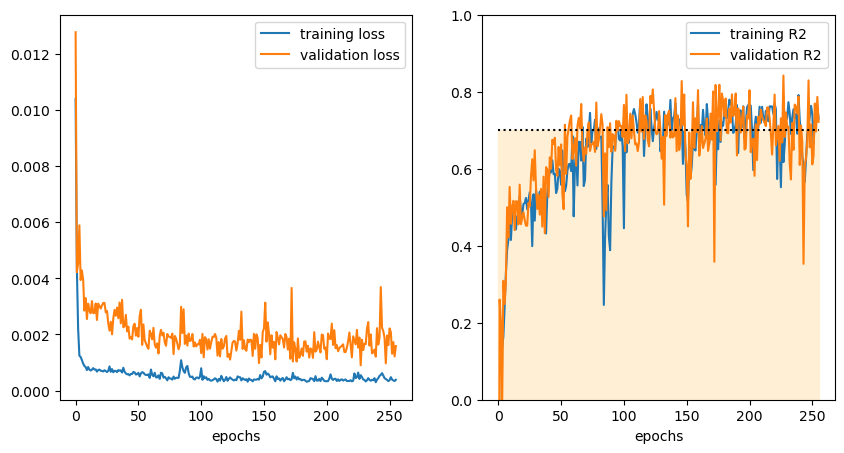

In [37]:
sbvNN.show_learning_plots(sbvhist)

In [38]:
sbvNN.evaluate(sbvxnn_test, sbvynn_test, sbvNNmodel)

1/1 - 0s - loss: 0.0016 - r_square: 0.7217 - 19ms/epoch - 19ms/step


In [39]:
xin = np.array([[2500/10000, .25*.25*10, .25*.25*3, 3/10]])
sbvNN.predict(NNmodel, xin)[0][0]*10000

1/1 [==============================] - 0s 15ms/step


718.4956967830658

## reinforced concret columns

### Linear Regression

In [40]:
sb[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,3243.000000,69.000000,607.000000,2539.000000,2539.000000,3243.000000,3243.000000,3243.000000,3243.000000
mean,2831.938329,8.007246,0.281323,0.278633,0.395482,0.104364,0.359838,3.358403,866.763535
std,2384.472427,15.188640,0.075893,0.066329,0.150576,0.058148,0.255103,1.012288,618.293080
min,1.000000,1.000000,0.159000,0.180000,0.180000,0.019856,0.055000,2.060000,111.891000
25%,1100.000000,1.000000,0.200000,0.220000,0.300000,0.070686,0.197213,2.685000,498.219085
50%,2160.000000,1.000000,0.300000,0.300000,0.350000,0.090000,0.300437,3.150000,704.600000
75%,3852.000000,1.000000,0.300000,0.300000,0.500000,0.129600,0.432900,3.585000,986.619000
max,15000.000000,50.000000,0.500000,0.600000,1.000000,0.375000,2.635500,9.140000,6551.896000


In [41]:
sbx = sb[["Nd", "A", "V", "l"]]
sby = sb[["Stückpreis"]]

In [42]:
sbx_train, sbx_test, sby_train, sby_test = cas.create_test_train_set(sbx, sby)

In [43]:
sbLM = cas.LinearModel()
sbLMmodel = sbLM.linear_model(sbx_train, sby_train)
print("MSE:")
print(f"Train: {sbLM.mse(sbx_train, sby_train, sbLMmodel):0.0f}")
print(f"Test: {sbLM.mse(sbx_test, sby_test, sbLMmodel):0.0f}")
print("\nR2:")
print(f"Train: {sbLM.r2(sbx_train, sby_train, sbLMmodel):0.4f}")
print(f"Test: {sbLM.r2(sbx_test, sby_test, sbLMmodel):0.4f}")

MSE:
Train: 331
Test: 297

R2:
Train: 0.7269
Test: 0.7136


### Neural Network

In [44]:
sbxnn = sbx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sbynn = sby.mul({"Stückpreis": 1/10000})

In [45]:
sbxnn_train, sbxnn_test, sbynn_train, sbynn_test = cas.create_test_train_set(sbxnn, sbynn)

In [46]:
sbNN = cas.NeuralNetwork()
sbNNmodel = sbNN.creat_network(4)

In [47]:
sbhist = sbNN.fit_model(sbNNmodel, sbxnn_train, sbynn_train, sbxnn_test, sbynn_test)

Epoch 1/256
82/82 [==============================] - 1s 3ms/step - loss: 0.0038 - r_square: 0.0031 - val_loss: 7.3632e-04 - val_r_square: 0.8054
Epoch 2/256
82/82 [==============================] - 0s 2ms/step - loss: 9.3518e-04 - r_square: 0.7559 - val_loss: 0.0011 - val_r_square: 0.7214
Epoch 3/256
82/82 [==============================] - 0s 2ms/step - loss: 8.4259e-04 - r_square: 0.7801 - val_loss: 7.6498e-04 - val_r_square: 0.7979
Epoch 4/256
82/82 [==============================] - 0s 2ms/step - loss: 8.6920e-04 - r_square: 0.7731 - val_loss: 6.5976e-04 - val_r_square: 0.8257
Epoch 5/256
82/82 [==============================] - 0s 2ms/step - loss: 9.1568e-04 - r_square: 0.7610 - val_loss: 6.3840e-04 - val_r_square: 0.8313
Epoch 6/256
82/82 [==============================] - 0s 2ms/step - loss: 9.0749e-04 - r_square: 0.7631 - val_loss: 7.7208e-04 - val_r_square: 0.7960
Epoch 7/256
82/82 [==============================] - 0s 2ms/step - loss: 7.8372e-04 - r_square: 0.7954 - val_loss:

Epoch 56/256
82/82 [==============================] - 0s 2ms/step - loss: 6.2214e-04 - r_square: 0.8376 - val_loss: 5.7378e-04 - val_r_square: 0.8484
Epoch 57/256
82/82 [==============================] - 0s 2ms/step - loss: 7.5711e-04 - r_square: 0.8024 - val_loss: 0.0014 - val_r_square: 0.6354
Epoch 58/256
82/82 [==============================] - 0s 2ms/step - loss: 6.2534e-04 - r_square: 0.8368 - val_loss: 5.5160e-04 - val_r_square: 0.8543
Epoch 59/256
82/82 [==============================] - 0s 2ms/step - loss: 6.6075e-04 - r_square: 0.8275 - val_loss: 5.8456e-04 - val_r_square: 0.8455
Epoch 60/256
82/82 [==============================] - 0s 2ms/step - loss: 6.8430e-04 - r_square: 0.8214 - val_loss: 6.4242e-04 - val_r_square: 0.8303
Epoch 61/256
82/82 [==============================] - 0s 2ms/step - loss: 6.5467e-04 - r_square: 0.8291 - val_loss: 7.1822e-04 - val_r_square: 0.8102
Epoch 62/256
82/82 [==============================] - 0s 2ms/step - loss: 6.6701e-04 - r_square: 0.8259 

82/82 [==============================] - 0s 2ms/step - loss: 5.5814e-04 - r_square: 0.8543 - val_loss: 4.5729e-04 - val_r_square: 0.8792
Epoch 111/256
82/82 [==============================] - 0s 2ms/step - loss: 6.1081e-04 - r_square: 0.8406 - val_loss: 4.8417e-04 - val_r_square: 0.8721
Epoch 112/256
82/82 [==============================] - 0s 2ms/step - loss: 5.6546e-04 - r_square: 0.8524 - val_loss: 4.5805e-04 - val_r_square: 0.8790
Epoch 113/256
82/82 [==============================] - 0s 2ms/step - loss: 5.3416e-04 - r_square: 0.8606 - val_loss: 4.7635e-04 - val_r_square: 0.8741
Epoch 114/256
82/82 [==============================] - 0s 2ms/step - loss: 5.0407e-04 - r_square: 0.8684 - val_loss: 7.6993e-04 - val_r_square: 0.7966
Epoch 115/256
82/82 [==============================] - 0s 2ms/step - loss: 5.7004e-04 - r_square: 0.8512 - val_loss: 4.6552e-04 - val_r_square: 0.8770
Epoch 116/256
82/82 [==============================] - 0s 2ms/step - loss: 5.5387e-04 - r_square: 0.8554 - v

82/82 [==============================] - 0s 2ms/step - loss: 5.3278e-04 - r_square: 0.8609 - val_loss: 7.5276e-04 - val_r_square: 0.8011
Epoch 165/256
82/82 [==============================] - 0s 1ms/step - loss: 5.3460e-04 - r_square: 0.8605 - val_loss: 4.6580e-04 - val_r_square: 0.8769
Epoch 166/256
82/82 [==============================] - 0s 2ms/step - loss: 5.2462e-04 - r_square: 0.8631 - val_loss: 5.1005e-04 - val_r_square: 0.8652
Epoch 167/256
82/82 [==============================] - 0s 2ms/step - loss: 4.8652e-04 - r_square: 0.8730 - val_loss: 5.8031e-04 - val_r_square: 0.8467
Epoch 168/256
82/82 [==============================] - 0s 2ms/step - loss: 4.8936e-04 - r_square: 0.8723 - val_loss: 4.2792e-04 - val_r_square: 0.8869
Epoch 169/256
82/82 [==============================] - 0s 2ms/step - loss: 5.9905e-04 - r_square: 0.8436 - val_loss: 5.6384e-04 - val_r_square: 0.8510
Epoch 170/256
82/82 [==============================] - 0s 2ms/step - loss: 4.6349e-04 - r_square: 0.8790 - v

82/82 [==============================] - 0s 2ms/step - loss: 5.3637e-04 - r_square: 0.8600 - val_loss: 5.1500e-04 - val_r_square: 0.8639
Epoch 219/256
82/82 [==============================] - 0s 2ms/step - loss: 5.2235e-04 - r_square: 0.8637 - val_loss: 4.3653e-04 - val_r_square: 0.8847
Epoch 220/256
82/82 [==============================] - 0s 2ms/step - loss: 4.8719e-04 - r_square: 0.8728 - val_loss: 4.7126e-04 - val_r_square: 0.8755
Epoch 221/256
82/82 [==============================] - 0s 2ms/step - loss: 4.8692e-04 - r_square: 0.8729 - val_loss: 4.7588e-04 - val_r_square: 0.8743
Epoch 222/256
82/82 [==============================] - 0s 2ms/step - loss: 4.5108e-04 - r_square: 0.8823 - val_loss: 4.5686e-04 - val_r_square: 0.8793
Epoch 223/256
82/82 [==============================] - 0s 2ms/step - loss: 4.5826e-04 - r_square: 0.8804 - val_loss: 4.2306e-04 - val_r_square: 0.8882
Epoch 224/256
82/82 [==============================] - 0s 2ms/step - loss: 4.9303e-04 - r_square: 0.8713 - v

In [48]:
sbNN.evaluate(sbxnn_test, sbynn_test, sbNNmodel)

21/21 - 0s - loss: 5.5900e-04 - r_square: 0.8523 - 35ms/epoch - 2ms/step


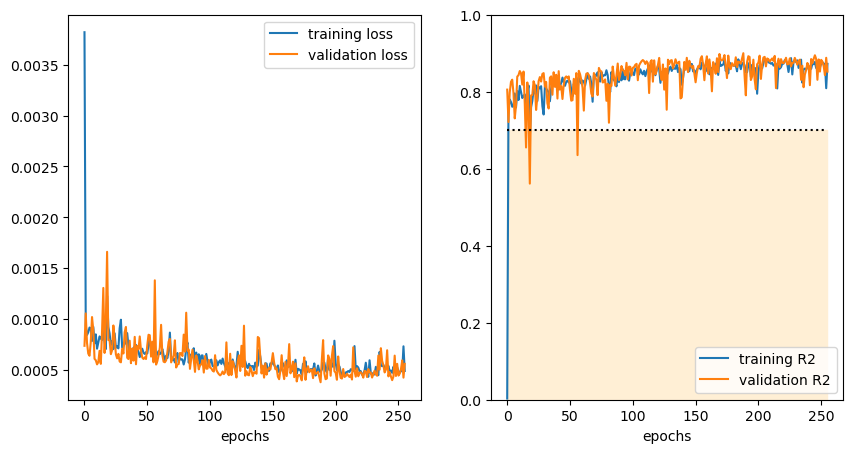

In [49]:
sbNN.show_learning_plots(sbhist)

## reinforced concret columns, round

### Linear Regression

In [50]:
sb_rund[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,607.000000,5.000000,607.000000,0.0,0.0,607.000000,607.000000,607.000000,607.000000
mean,2122.448105,23.500000,0.281323,NaN,NaN,0.066675,0.223642,3.200247,680.055281
std,1856.476260,9.287088,0.075893,NaN,NaN,0.038008,0.159979,0.713771,368.812978
min,1.000000,17.500000,0.159000,NaN,NaN,0.019856,0.055000,2.279000,241.098000
25%,800.000000,20.000000,0.200000,NaN,NaN,0.031416,0.098960,2.740000,426.836620
50%,1500.000000,20.000000,0.300000,NaN,NaN,0.070686,0.174260,3.140000,570.644100
75%,2770.000000,20.000000,0.300000,NaN,NaN,0.070686,0.267192,3.390000,836.336449
max,11100.000000,40.000000,0.500000,NaN,NaN,0.196350,1.392118,7.090000,2730.026000


In [51]:
sb_rundx = sb_rund[["Nd", "A", "V", "l"]]
sb_rundy = sb_rund[["Stückpreis"]]

In [52]:
sb_rundx_train, sb_rundx_test, sb_rundy_train, sb_rundy_test = cas.create_test_train_set(sb_rundx, sb_rundy)

In [53]:
sb_rundLM = cas.LinearModel()
sb_rundLMmodel = sb_rundLM.linear_model(sb_rundx_train, sb_rundy_train)
print("MSE:")
print(f"{sb_rundLM.mse(sb_rundx_train, sb_rundy_train, sb_rundLMmodel):0.0f}")
print(f"{sb_rundLM.mse(sb_rundx_test, sb_rundy_test, sb_rundLMmodel):0.0f}")
print("\nR2:")
print(f"{sb_rundLM.r2(sb_rundx_train, sb_rundy_train, sb_rundLMmodel):0.4f}")
print(f"{sb_rundLM.r2(sb_rundx_test, sb_rundy_test, sb_rundLMmodel):0.4f}")

MSE:
193
187

R2:
0.7119
0.7780


### Neural Network

In [54]:
sb_rundxnn = sb_rundx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sb_rundynn = sb_rundy.mul({"Stückpreis": 1/10000})

In [55]:
sb_rundxnn_train, sb_rundxnn_test, sb_rundynn_train, sb_rundynn_test = cas.create_test_train_set(sb_rundxnn, sb_rundynn)

In [56]:
sb_rundNN = cas.NeuralNetwork()
sb_rundNNmodel = sb_rundNN.creat_network(4)

In [57]:
sb_rundhist = sb_rundNN.fit_model(sb_rundNNmodel, sb_rundxnn_train, sb_rundynn_train, sb_rundxnn_test, sb_rundynn_test)

Epoch 1/256
16/16 [==============================] - 1s 12ms/step - loss: 0.0047 - r_square: -2.5872 - val_loss: 0.0019 - val_r_square: -0.2117
Epoch 2/256
16/16 [==============================] - 0s 4ms/step - loss: 0.0012 - r_square: 0.0710 - val_loss: 0.0012 - val_r_square: 0.2689
Epoch 3/256
16/16 [==============================] - 0s 4ms/step - loss: 8.2587e-04 - r_square: 0.3654 - val_loss: 0.0010 - val_r_square: 0.3637
Epoch 4/256
16/16 [==============================] - 0s 4ms/step - loss: 7.8444e-04 - r_square: 0.3972 - val_loss: 9.8900e-04 - val_r_square: 0.3752
Epoch 5/256
16/16 [==============================] - 0s 5ms/step - loss: 6.7112e-04 - r_square: 0.4843 - val_loss: 6.8699e-04 - val_r_square: 0.5660
Epoch 6/256
16/16 [==============================] - 0s 4ms/step - loss: 4.1874e-04 - r_square: 0.6782 - val_loss: 5.3872e-04 - val_r_square: 0.6597
Epoch 7/256
16/16 [==============================] - 0s 4ms/step - loss: 3.8659e-04 - r_square: 0.7029 - val_loss: 4.2873e-

Epoch 56/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9107e-04 - r_square: 0.7763 - val_loss: 3.5983e-04 - val_r_square: 0.7727
Epoch 57/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9030e-04 - r_square: 0.7769 - val_loss: 3.6851e-04 - val_r_square: 0.7672
Epoch 58/256
16/16 [==============================] - 0s 4ms/step - loss: 3.0065e-04 - r_square: 0.7690 - val_loss: 3.2933e-04 - val_r_square: 0.7919
Epoch 59/256
16/16 [==============================] - 0s 4ms/step - loss: 3.7729e-04 - r_square: 0.7101 - val_loss: 4.6515e-04 - val_r_square: 0.7061
Epoch 60/256
16/16 [==============================] - 0s 4ms/step - loss: 3.2994e-04 - r_square: 0.7465 - val_loss: 2.9933e-04 - val_r_square: 0.8109
Epoch 61/256
16/16 [==============================] - 0s 4ms/step - loss: 3.5349e-04 - r_square: 0.7284 - val_loss: 3.2992e-04 - val_r_square: 0.7916
Epoch 62/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9328e-04 - r_square: 0.7

16/16 [==============================] - 0s 4ms/step - loss: 3.3438e-04 - r_square: 0.7431 - val_loss: 3.6695e-04 - val_r_square: 0.7682
Epoch 111/256
16/16 [==============================] - 0s 4ms/step - loss: 2.5957e-04 - r_square: 0.8005 - val_loss: 2.9523e-04 - val_r_square: 0.8135
Epoch 112/256
16/16 [==============================] - 0s 4ms/step - loss: 2.4898e-04 - r_square: 0.8087 - val_loss: 3.0994e-04 - val_r_square: 0.8042
Epoch 113/256
16/16 [==============================] - 0s 4ms/step - loss: 2.2728e-04 - r_square: 0.8254 - val_loss: 2.9987e-04 - val_r_square: 0.8106
Epoch 114/256
16/16 [==============================] - 0s 4ms/step - loss: 2.2718e-04 - r_square: 0.8254 - val_loss: 4.2493e-04 - val_r_square: 0.7315
Epoch 115/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9962e-04 - r_square: 0.7698 - val_loss: 3.1953e-04 - val_r_square: 0.7981
Epoch 116/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9542e-04 - r_square: 0.7730 - v

16/16 [==============================] - 0s 4ms/step - loss: 2.8912e-04 - r_square: 0.7778 - val_loss: 5.0765e-04 - val_r_square: 0.6793
Epoch 165/256
16/16 [==============================] - 0s 4ms/step - loss: 3.6765e-04 - r_square: 0.7175 - val_loss: 5.1005e-04 - val_r_square: 0.6778
Epoch 166/256
16/16 [==============================] - 0s 4ms/step - loss: 2.5461e-04 - r_square: 0.8044 - val_loss: 3.1533e-04 - val_r_square: 0.8008
Epoch 167/256
16/16 [==============================] - 0s 4ms/step - loss: 2.3609e-04 - r_square: 0.8186 - val_loss: 3.1293e-04 - val_r_square: 0.8023
Epoch 168/256
16/16 [==============================] - 0s 4ms/step - loss: 2.1257e-04 - r_square: 0.8367 - val_loss: 3.0674e-04 - val_r_square: 0.8062
Epoch 169/256
16/16 [==============================] - 0s 4ms/step - loss: 2.2409e-04 - r_square: 0.8278 - val_loss: 3.3099e-04 - val_r_square: 0.7909
Epoch 170/256
16/16 [==============================] - 0s 4ms/step - loss: 2.9076e-04 - r_square: 0.7766 - v

16/16 [==============================] - 0s 4ms/step - loss: 3.1846e-04 - r_square: 0.7553 - val_loss: 3.3572e-04 - val_r_square: 0.7879
Epoch 219/256
16/16 [==============================] - 0s 4ms/step - loss: 2.5724e-04 - r_square: 0.8023 - val_loss: 2.8892e-04 - val_r_square: 0.8175
Epoch 220/256
16/16 [==============================] - 0s 4ms/step - loss: 2.3575e-04 - r_square: 0.8188 - val_loss: 2.7567e-04 - val_r_square: 0.8258
Epoch 221/256
16/16 [==============================] - 0s 4ms/step - loss: 2.0937e-04 - r_square: 0.8391 - val_loss: 3.6239e-04 - val_r_square: 0.7711
Epoch 222/256
16/16 [==============================] - 0s 4ms/step - loss: 2.6450e-04 - r_square: 0.7968 - val_loss: 3.3912e-04 - val_r_square: 0.7858
Epoch 223/256
16/16 [==============================] - 0s 4ms/step - loss: 2.2176e-04 - r_square: 0.8296 - val_loss: 3.3070e-04 - val_r_square: 0.7911
Epoch 224/256
16/16 [==============================] - 0s 4ms/step - loss: 2.8973e-04 - r_square: 0.7774 - v

In [58]:
sb_rundNN.evaluate(sb_rundxnn_test, sb_rundynn_test, sb_rundNNmodel)

4/4 - 0s - loss: 3.0623e-04 - r_square: 0.8065 - 22ms/epoch - 5ms/step


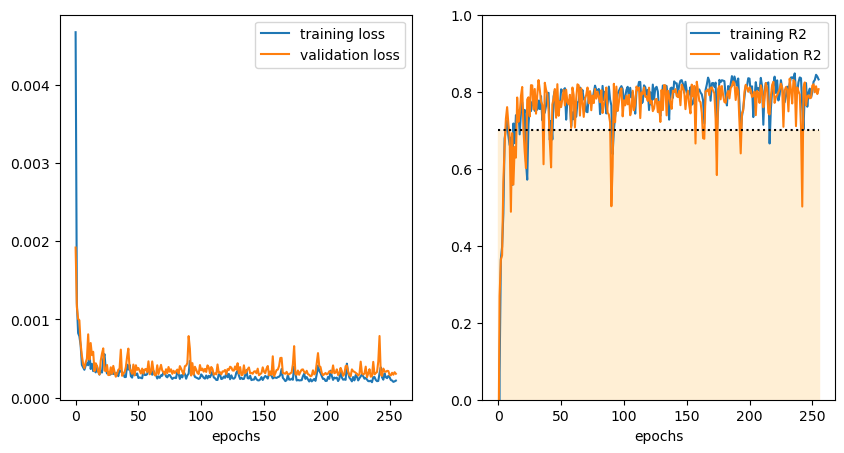

In [59]:
sb_rundNN.show_learning_plots(sb_rundhist)

## reinforced concret columns, angular

### Linear Regression

In [60]:
sb_eckig[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,2287.000000,9.000000,0.0,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000
mean,2775.988631,42.222222,NaN,0.277927,0.377420,0.107961,0.369798,3.342815,858.808635
std,2387.911209,10.639288,NaN,0.067124,0.139392,0.055696,0.258234,1.009334,610.598967
min,1.000000,20.000000,NaN,0.180000,0.180000,0.032400,0.082400,2.060000,111.891000
25%,1100.000000,40.000000,NaN,0.220000,0.300000,0.075600,0.207000,2.660000,501.280000
50%,2090.000000,45.000000,NaN,0.300000,0.300000,0.090000,0.300600,3.110000,701.820000
75%,3700.000000,50.000000,NaN,0.300000,0.500000,0.134400,0.436500,3.580000,971.488958
max,15000.000000,50.000000,NaN,0.600000,1.000000,0.360000,2.635500,9.140000,6551.896000


In [61]:
sb_eckigx = sb_eckig[["Nd", "A", "V", "l"]]
sb_eckigy = sb_eckig[["Stückpreis"]]

In [62]:
sb_eckigx_train, sb_eckigx_test, sb_eckigy_train, sb_eckigy_test = cas.create_test_train_set(sb_eckigx, sb_eckigy)

In [63]:
sb_eckigLM = cas.LinearModel()
sb_eckigLMmodel = sb_eckigLM.linear_model(sb_eckigx_train, sb_eckigy_train)
print("MSE:")
print(f"{sb_eckigLM.mse(sb_eckigx_train, sb_eckigy_train, sb_eckigLMmodel):0.0f}")
print(f"{sb_eckigLM.mse(sb_eckigx_test, sb_eckigy_test, sb_eckigLMmodel):0.0f}")
print("\nR2:")
print(f"{sb_eckigLM.r2(sb_eckigx_train, sb_eckigy_train, sb_eckigLMmodel):0.4f}")
print(f"{sb_eckigLM.r2(sb_eckigx_test, sb_eckigy_test, sb_eckigLMmodel):0.4f}")

MSE:
327
329

R2:
0.7241
0.6532


### Neural Network

In [64]:
sb_eckigxnn = sb_eckigx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sb_eckigynn = sb_eckigy.mul({"Stückpreis": 1/10000})

In [65]:
sb_eckigxnn_train, sb_eckigxnn_test, sb_eckigynn_train, sb_eckigynn_test = cas.create_test_train_set(sb_eckigxnn, sb_eckigynn)

In [66]:
sb_eckigNN = cas.NeuralNetwork()
sb_eckigNNmodel = sb_eckigNN.creat_network(4)

In [67]:
sb_eckighist = sb_eckigNN.fit_model(sb_eckigNNmodel, sb_eckigxnn_train, sb_eckigynn_train, sb_eckigxnn_test, sb_eckigynn_test)

Epoch 1/256
58/58 [==============================] - 1s 4ms/step - loss: 0.0048 - r_square: -0.3338 - val_loss: 0.0015 - val_r_square: 0.6563
Epoch 2/256
58/58 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7035 - val_loss: 8.8245e-04 - val_r_square: 0.7978
Epoch 3/256
58/58 [==============================] - 0s 5ms/step - loss: 7.5876e-04 - r_square: 0.7870 - val_loss: 8.7187e-04 - val_r_square: 0.8002
Epoch 4/256
58/58 [==============================] - 0s 2ms/step - loss: 7.8962e-04 - r_square: 0.7784 - val_loss: 0.0013 - val_r_square: 0.6951
Epoch 5/256
58/58 [==============================] - 0s 2ms/step - loss: 8.7525e-04 - r_square: 0.7543 - val_loss: 7.3423e-04 - val_r_square: 0.8318
Epoch 6/256
58/58 [==============================] - 0s 2ms/step - loss: 7.4321e-04 - r_square: 0.7914 - val_loss: 0.0035 - val_r_square: 0.2044
Epoch 7/256
58/58 [==============================] - 0s 2ms/step - loss: 0.0018 - r_square: 0.4927 - val_loss: 0.0010 - val_r

58/58 [==============================] - 0s 2ms/step - loss: 5.4077e-04 - r_square: 0.8482 - val_loss: 9.7121e-04 - val_r_square: 0.7775
Epoch 57/256
58/58 [==============================] - 0s 2ms/step - loss: 6.4616e-04 - r_square: 0.8186 - val_loss: 8.5493e-04 - val_r_square: 0.8041
Epoch 58/256
58/58 [==============================] - 0s 2ms/step - loss: 6.5389e-04 - r_square: 0.8165 - val_loss: 6.5492e-04 - val_r_square: 0.8499
Epoch 59/256
58/58 [==============================] - 0s 2ms/step - loss: 6.6446e-04 - r_square: 0.8135 - val_loss: 6.4732e-04 - val_r_square: 0.8517
Epoch 60/256
58/58 [==============================] - 0s 2ms/step - loss: 5.8689e-04 - r_square: 0.8353 - val_loss: 7.9170e-04 - val_r_square: 0.8186
Epoch 61/256
58/58 [==============================] - 0s 2ms/step - loss: 5.8218e-04 - r_square: 0.8366 - val_loss: 6.3014e-04 - val_r_square: 0.8556
Epoch 62/256
58/58 [==============================] - 0s 2ms/step - loss: 7.1942e-04 - r_square: 0.7981 - val_los

Epoch 111/256
58/58 [==============================] - 0s 2ms/step - loss: 5.5831e-04 - r_square: 0.8433 - val_loss: 5.7141e-04 - val_r_square: 0.8691
Epoch 112/256
58/58 [==============================] - 0s 2ms/step - loss: 4.8815e-04 - r_square: 0.8630 - val_loss: 5.9218e-04 - val_r_square: 0.8643
Epoch 113/256
58/58 [==============================] - 0s 2ms/step - loss: 5.5162e-04 - r_square: 0.8452 - val_loss: 5.9200e-04 - val_r_square: 0.8644
Epoch 114/256
58/58 [==============================] - 0s 2ms/step - loss: 5.3160e-04 - r_square: 0.8508 - val_loss: 6.9016e-04 - val_r_square: 0.8419
Epoch 115/256
58/58 [==============================] - 0s 2ms/step - loss: 5.1973e-04 - r_square: 0.8541 - val_loss: 6.5562e-04 - val_r_square: 0.8498
Epoch 116/256
58/58 [==============================] - 0s 2ms/step - loss: 5.5163e-04 - r_square: 0.8452 - val_loss: 5.4005e-04 - val_r_square: 0.8763
Epoch 117/256
58/58 [==============================] - 0s 2ms/step - loss: 5.0769e-04 - r_squa

58/58 [==============================] - 0s 2ms/step - loss: 4.8613e-04 - r_square: 0.8635 - val_loss: 5.1262e-04 - val_r_square: 0.8825
Epoch 166/256
58/58 [==============================] - 0s 2ms/step - loss: 4.6734e-04 - r_square: 0.8688 - val_loss: 5.2623e-04 - val_r_square: 0.8794
Epoch 167/256
58/58 [==============================] - 0s 2ms/step - loss: 4.8020e-04 - r_square: 0.8652 - val_loss: 5.9394e-04 - val_r_square: 0.8639
Epoch 168/256
58/58 [==============================] - 0s 2ms/step - loss: 4.9146e-04 - r_square: 0.8620 - val_loss: 6.4030e-04 - val_r_square: 0.8533
Epoch 169/256
58/58 [==============================] - 0s 2ms/step - loss: 5.1701e-04 - r_square: 0.8549 - val_loss: 5.5319e-04 - val_r_square: 0.8733
Epoch 170/256
58/58 [==============================] - 0s 2ms/step - loss: 5.1480e-04 - r_square: 0.8555 - val_loss: 5.9367e-04 - val_r_square: 0.8640
Epoch 171/256
58/58 [==============================] - 0s 2ms/step - loss: 4.9683e-04 - r_square: 0.8605 - v

58/58 [==============================] - 0s 2ms/step - loss: 4.6246e-04 - r_square: 0.8702 - val_loss: 6.0014e-04 - val_r_square: 0.8625
Epoch 220/256
58/58 [==============================] - 0s 2ms/step - loss: 4.4688e-04 - r_square: 0.8746 - val_loss: 5.3280e-04 - val_r_square: 0.8779
Epoch 221/256
58/58 [==============================] - 0s 2ms/step - loss: 5.7011e-04 - r_square: 0.8400 - val_loss: 5.4601e-04 - val_r_square: 0.8749
Epoch 222/256
58/58 [==============================] - 0s 2ms/step - loss: 4.4342e-04 - r_square: 0.8755 - val_loss: 6.4128e-04 - val_r_square: 0.8531
Epoch 223/256
58/58 [==============================] - 0s 2ms/step - loss: 4.9782e-04 - r_square: 0.8603 - val_loss: 6.3033e-04 - val_r_square: 0.8556
Epoch 224/256
58/58 [==============================] - 0s 2ms/step - loss: 4.5832e-04 - r_square: 0.8713 - val_loss: 6.6103e-04 - val_r_square: 0.8485
Epoch 225/256
58/58 [==============================] - 0s 2ms/step - loss: 4.5788e-04 - r_square: 0.8715 - v

In [68]:
sb_eckigNN.evaluate(sb_eckigxnn_test, sb_eckigynn_test, sb_eckigNNmodel)

15/15 - 0s - loss: 5.9992e-04 - r_square: 0.8625 - 34ms/epoch - 2ms/step


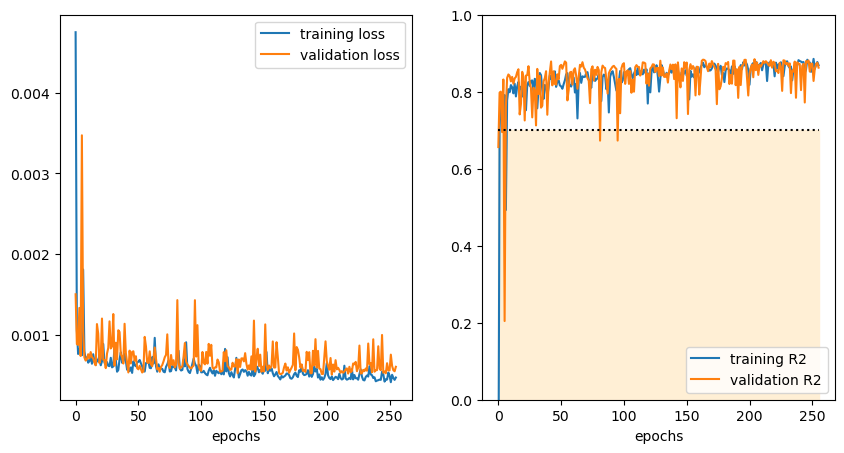

In [69]:
sb_eckigNN.show_learning_plots(sb_eckighist)

## reinforced concret columns, oval

### Linear Regression

In [70]:
sb_oval[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,252.000000,0.0,0.0,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,4971.337302,NaN,NaN,0.28504,0.559405,0.163497,0.598060,3.819456,1357.206119
std,2622.519694,NaN,NaN,0.05835,0.149493,0.069648,0.261164,1.556533,931.750136
min,500.000000,NaN,NaN,0.20000,0.300000,0.080000,0.195200,2.440000,323.817000
25%,2900.000000,NaN,NaN,0.27000,0.480000,0.125000,0.369000,2.500000,712.765000
50%,4474.500000,NaN,NaN,0.27000,0.500000,0.129600,0.600000,2.900000,1054.345500
75%,6714.250000,NaN,NaN,0.30000,0.750000,0.240000,0.798336,5.930000,1565.850000
max,12300.000000,NaN,NaN,0.50000,0.900000,0.375000,1.139820,6.280000,4174.651000


In [71]:
sb_ovalx = sb_oval[["Nd", "A", "V", "l"]]
sb_ovaly = sb_oval[["Stückpreis"]]

In [72]:
sb_ovalx_train, sb_ovalx_test, sb_ovaly_train, sb_ovaly_test = cas.create_test_train_set(sb_ovalx, sb_ovaly)

In [73]:
sb_ovalLM = cas.LinearModel()
sb_ovalLMmodel = sb_ovalLM.linear_model(sb_ovalx_train, sb_ovaly_train)
print("MSE:")
print(f"{sb_ovalLM.mse(sb_ovalx_train, sb_ovaly_train, sb_ovalLMmodel):0.0f}")
print(f"{sb_ovalLM.mse(sb_ovalx_test, sb_ovaly_test, sb_ovalLMmodel):0.0f}")
print("\nR2:")
print(f"{sb_ovalLM.r2(sb_ovalx_train, sb_ovaly_train, sb_ovalLMmodel):0.4f}")
print(f"{sb_ovalLM.r2(sb_ovalx_test, sb_ovaly_test, sb_ovalLMmodel):0.4f}")

MSE:
436
384

R2:
0.7929
0.7714


### Neural Network

In [74]:
sb_ovalxnn = sb_ovalx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
sb_ovalynn = sb_ovaly.mul({"Stückpreis": 1/10000})

In [75]:
sb_ovalxnn_train, sb_ovalxnn_test, sb_ovalynn_train, sb_ovalynn_test = cas.create_test_train_set(sb_ovalxnn, sb_ovalynn)

In [76]:
sb_ovalNN = cas.NeuralNetwork()
sb_ovalNNmodel = sb_ovalNN.creat_network(4)

In [77]:
sb_ovalhist = sb_ovalNN.fit_model(sb_ovalNNmodel, sb_ovalxnn_train, sb_ovalynn_train, sb_ovalxnn_test, sb_ovalynn_test)

Epoch 1/256
7/7 [==============================] - 1s 25ms/step - loss: 0.0822 - r_square: -8.0381 - val_loss: 0.0092 - val_r_square: -0.3760
Epoch 2/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0089 - r_square: 0.0264 - val_loss: 0.0104 - val_r_square: -0.5668
Epoch 3/256
7/7 [==============================] - 0s 10ms/step - loss: 0.0074 - r_square: 0.1898 - val_loss: 0.0029 - val_r_square: 0.5676
Epoch 4/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0042 - r_square: 0.5363 - val_loss: 0.0027 - val_r_square: 0.5913
Epoch 5/256
7/7 [==============================] - 0s 9ms/step - loss: 0.0036 - r_square: 0.6000 - val_loss: 0.0037 - val_r_square: 0.4383
Epoch 6/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0028 - r_square: 0.6882 - val_loss: 0.0016 - val_r_square: 0.7639
Epoch 7/256
7/7 [==============================] - 0s 9ms/step - loss: 0.0021 - r_square: 0.7711 - val_loss: 0.0012 - val_r_square: 0.8151
Epoch 8/256
7/7 [=====

7/7 [==============================] - 0s 8ms/step - loss: 4.7652e-04 - r_square: 0.9476 - val_loss: 5.4260e-04 - val_r_square: 0.9186
Epoch 58/256
7/7 [==============================] - 0s 7ms/step - loss: 6.0379e-04 - r_square: 0.9336 - val_loss: 2.4920e-04 - val_r_square: 0.9626
Epoch 59/256
7/7 [==============================] - 0s 9ms/step - loss: 5.0444e-04 - r_square: 0.9446 - val_loss: 2.4708e-04 - val_r_square: 0.9629
Epoch 60/256
7/7 [==============================] - 0s 8ms/step - loss: 5.5101e-04 - r_square: 0.9394 - val_loss: 3.6373e-04 - val_r_square: 0.9455
Epoch 61/256
7/7 [==============================] - 0s 8ms/step - loss: 4.2894e-04 - r_square: 0.9529 - val_loss: 2.9564e-04 - val_r_square: 0.9557
Epoch 62/256
7/7 [==============================] - 0s 8ms/step - loss: 4.2415e-04 - r_square: 0.9534 - val_loss: 3.5657e-04 - val_r_square: 0.9465
Epoch 63/256
7/7 [==============================] - 0s 8ms/step - loss: 4.5345e-04 - r_square: 0.9502 - val_loss: 3.3263e-04 

7/7 [==============================] - 0s 7ms/step - loss: 3.2649e-04 - r_square: 0.9641 - val_loss: 2.5182e-04 - val_r_square: 0.9622
Epoch 113/256
7/7 [==============================] - 0s 8ms/step - loss: 3.1804e-04 - r_square: 0.9650 - val_loss: 2.7358e-04 - val_r_square: 0.9590
Epoch 114/256
7/7 [==============================] - 0s 8ms/step - loss: 3.6209e-04 - r_square: 0.9602 - val_loss: 2.7623e-04 - val_r_square: 0.9586
Epoch 115/256
7/7 [==============================] - 0s 8ms/step - loss: 3.5789e-04 - r_square: 0.9607 - val_loss: 2.8930e-04 - val_r_square: 0.9566
Epoch 116/256
7/7 [==============================] - 0s 8ms/step - loss: 3.4912e-04 - r_square: 0.9616 - val_loss: 2.8344e-04 - val_r_square: 0.9575
Epoch 117/256
7/7 [==============================] - 0s 7ms/step - loss: 3.0976e-04 - r_square: 0.9660 - val_loss: 2.5161e-04 - val_r_square: 0.9623
Epoch 118/256
7/7 [==============================] - 0s 9ms/step - loss: 2.7269e-04 - r_square: 0.9700 - val_loss: 2.753

7/7 [==============================] - 0s 8ms/step - loss: 3.6622e-04 - r_square: 0.9598 - val_loss: 2.8522e-04 - val_r_square: 0.9572
Epoch 168/256
7/7 [==============================] - 0s 8ms/step - loss: 3.6206e-04 - r_square: 0.9602 - val_loss: 2.8018e-04 - val_r_square: 0.9580
Epoch 169/256
7/7 [==============================] - 0s 8ms/step - loss: 3.2000e-04 - r_square: 0.9648 - val_loss: 3.0707e-04 - val_r_square: 0.9540
Epoch 170/256
7/7 [==============================] - 0s 8ms/step - loss: 2.9184e-04 - r_square: 0.9679 - val_loss: 2.7150e-04 - val_r_square: 0.9593
Epoch 171/256
7/7 [==============================] - 0s 8ms/step - loss: 2.6252e-04 - r_square: 0.9712 - val_loss: 2.7635e-04 - val_r_square: 0.9586
Epoch 172/256
7/7 [==============================] - 0s 8ms/step - loss: 2.7599e-04 - r_square: 0.9697 - val_loss: 2.6890e-04 - val_r_square: 0.9597
Epoch 173/256
7/7 [==============================] - 0s 8ms/step - loss: 2.6058e-04 - r_square: 0.9714 - val_loss: 2.955

7/7 [==============================] - 0s 8ms/step - loss: 3.2816e-04 - r_square: 0.9639 - val_loss: 3.2652e-04 - val_r_square: 0.9510
Epoch 223/256
7/7 [==============================] - 0s 7ms/step - loss: 2.9417e-04 - r_square: 0.9677 - val_loss: 3.3483e-04 - val_r_square: 0.9498
Epoch 224/256
7/7 [==============================] - 0s 8ms/step - loss: 4.0083e-04 - r_square: 0.9560 - val_loss: 4.2537e-04 - val_r_square: 0.9362
Epoch 225/256
7/7 [==============================] - 0s 8ms/step - loss: 3.4094e-04 - r_square: 0.9625 - val_loss: 3.2740e-04 - val_r_square: 0.9509
Epoch 226/256
7/7 [==============================] - 0s 8ms/step - loss: 2.8858e-04 - r_square: 0.9683 - val_loss: 4.8251e-04 - val_r_square: 0.9276
Epoch 227/256
7/7 [==============================] - 0s 7ms/step - loss: 4.5264e-04 - r_square: 0.9503 - val_loss: 5.1746e-04 - val_r_square: 0.9224
Epoch 228/256
7/7 [==============================] - 0s 8ms/step - loss: 4.3756e-04 - r_square: 0.9519 - val_loss: 4.234

In [78]:
sb_ovalNN.evaluate(sb_ovalxnn_test, sb_ovalynn_test, sb_ovalNNmodel)

2/2 - 0s - loss: 4.7377e-04 - r_square: 0.9290 - 20ms/epoch - 10ms/step


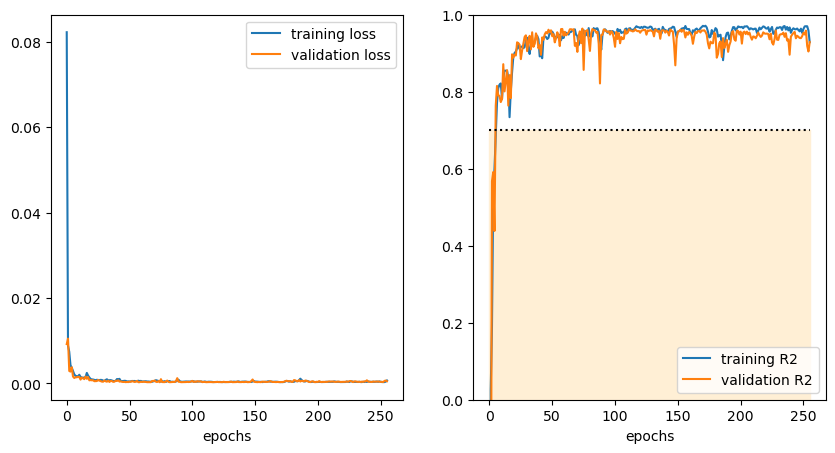

In [79]:
sb_ovalNN.show_learning_plots(sb_ovalhist)

## round

### Linear Model

In [80]:
rund[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,704.000000,5.000000,704.000000,0.0,0.0,704.000000,704.000000,704.000000,704.000000
mean,1989.923295,23.500000,0.265978,NaN,NaN,0.060743,0.202280,3.154425,695.869991
std,1805.122740,9.287088,0.081274,NaN,NaN,0.038556,0.158563,0.676408,377.062622
min,1.000000,17.500000,0.133000,NaN,NaN,0.013893,0.036399,2.279000,241.098000
25%,750.000000,20.000000,0.200000,NaN,NaN,0.031416,0.086080,2.740000,456.011400
50%,1400.000000,20.000000,0.250000,NaN,NaN,0.049087,0.162224,3.020000,602.968000
75%,2600.000000,20.000000,0.300000,NaN,NaN,0.070686,0.236798,3.342500,828.681750
max,11100.000000,40.000000,0.500000,NaN,NaN,0.196350,1.392118,7.090000,3432.520000


In [81]:
rundx = rund[["Nd", "A", "V", "l"]]
rundy = rund[["Stückpreis"]]

In [82]:
rundx_train, rundx_test, rundy_train, rundy_test = cas.create_test_train_set(rundx, rundy)

In [83]:
rundLM = cas.LinearModel()
rundLMmodel = rundLM.linear_model(rundx_train, rundy_train)
print("MSE:")
print(f"{rundLM.mse(rundx_train, rundy_train, rundLMmodel):0.0f}")
print(f"{rundLM.mse(rundx_test, rundy_test, rundLMmodel):0.0f}")
print("\nR2:")
print(f"{rundLM.r2(rundx_train, rundy_train, rundLMmodel):0.4f}")
print(f"{rundLM.r2(rundx_test, rundy_test, rundLMmodel):0.4f}")

MSE:
218
213

R2:
0.6686
0.6614


### Neural Network

In [84]:
rundxnn = rundx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
rundynn = rundy.mul({"Stückpreis": 1/10000})

In [85]:
rundxnn_train, rundxnn_test, rundynn_train, rundynn_test = cas.create_test_train_set(rundxnn, rundynn)

In [86]:
rundNN = cas.NeuralNetwork()
rundNNmodel = rundNN.creat_network(4)

In [87]:
rundhist = rundNN.fit_model(rundNNmodel, rundxnn_train, rundynn_train, rundxnn_test, rundynn_test)

Epoch 1/256
18/18 [==============================] - 1s 10ms/step - loss: 0.0038 - r_square: -1.6600 - val_loss: 0.0010 - val_r_square: 0.2105
Epoch 2/256
18/18 [==============================] - 0s 4ms/step - loss: 0.0010 - r_square: 0.3039 - val_loss: 6.9509e-04 - val_r_square: 0.4754
Epoch 3/256
18/18 [==============================] - 0s 4ms/step - loss: 6.0361e-04 - r_square: 0.5818 - val_loss: 5.2816e-04 - val_r_square: 0.6014
Epoch 4/256
18/18 [==============================] - 0s 4ms/step - loss: 4.8852e-04 - r_square: 0.6615 - val_loss: 2.8746e-04 - val_r_square: 0.7830
Epoch 5/256
18/18 [==============================] - 0s 4ms/step - loss: 4.4090e-04 - r_square: 0.6945 - val_loss: 3.3630e-04 - val_r_square: 0.7462
Epoch 6/256
18/18 [==============================] - 0s 4ms/step - loss: 4.5157e-04 - r_square: 0.6871 - val_loss: 2.8761e-04 - val_r_square: 0.7829
Epoch 7/256
18/18 [==============================] - 0s 4ms/step - loss: 4.6952e-04 - r_square: 0.6747 - val_loss: 6

Epoch 56/256
18/18 [==============================] - 0s 3ms/step - loss: 4.4515e-04 - r_square: 0.6916 - val_loss: 4.6653e-04 - val_r_square: 0.6479
Epoch 57/256
18/18 [==============================] - 0s 3ms/step - loss: 4.6215e-04 - r_square: 0.6798 - val_loss: 3.2509e-04 - val_r_square: 0.7546
Epoch 58/256
18/18 [==============================] - 0s 4ms/step - loss: 3.9064e-04 - r_square: 0.7293 - val_loss: 2.5847e-04 - val_r_square: 0.8049
Epoch 59/256
18/18 [==============================] - 0s 4ms/step - loss: 4.0641e-04 - r_square: 0.7184 - val_loss: 2.9845e-04 - val_r_square: 0.7747
Epoch 60/256
18/18 [==============================] - 0s 4ms/step - loss: 4.1944e-04 - r_square: 0.7094 - val_loss: 2.6884e-04 - val_r_square: 0.7971
Epoch 61/256
18/18 [==============================] - 0s 3ms/step - loss: 3.8296e-04 - r_square: 0.7347 - val_loss: 3.1577e-04 - val_r_square: 0.7617
Epoch 62/256
18/18 [==============================] - 0s 4ms/step - loss: 3.9189e-04 - r_square: 0.7

18/18 [==============================] - 0s 3ms/step - loss: 3.9851e-04 - r_square: 0.7239 - val_loss: 2.4719e-04 - val_r_square: 0.8134
Epoch 111/256
18/18 [==============================] - 0s 3ms/step - loss: 3.7524e-04 - r_square: 0.7400 - val_loss: 2.3449e-04 - val_r_square: 0.8230
Epoch 112/256
18/18 [==============================] - 0s 4ms/step - loss: 3.7043e-04 - r_square: 0.7433 - val_loss: 2.4403e-04 - val_r_square: 0.8158
Epoch 113/256
18/18 [==============================] - 0s 3ms/step - loss: 3.8665e-04 - r_square: 0.7321 - val_loss: 3.2333e-04 - val_r_square: 0.7560
Epoch 114/256
18/18 [==============================] - 0s 4ms/step - loss: 4.0639e-04 - r_square: 0.7184 - val_loss: 2.3825e-04 - val_r_square: 0.8202
Epoch 115/256
18/18 [==============================] - 0s 4ms/step - loss: 4.8904e-04 - r_square: 0.6612 - val_loss: 3.4829e-04 - val_r_square: 0.7371
Epoch 116/256
18/18 [==============================] - 0s 3ms/step - loss: 4.3285e-04 - r_square: 0.7001 - v

18/18 [==============================] - 0s 3ms/step - loss: 3.7525e-04 - r_square: 0.7400 - val_loss: 2.5349e-04 - val_r_square: 0.8087
Epoch 165/256
18/18 [==============================] - 0s 4ms/step - loss: 4.5256e-04 - r_square: 0.6864 - val_loss: 2.8288e-04 - val_r_square: 0.7865
Epoch 166/256
18/18 [==============================] - 0s 3ms/step - loss: 3.8995e-04 - r_square: 0.7298 - val_loss: 3.1228e-04 - val_r_square: 0.7643
Epoch 167/256
18/18 [==============================] - 0s 4ms/step - loss: 3.6527e-04 - r_square: 0.7469 - val_loss: 2.5003e-04 - val_r_square: 0.8113
Epoch 168/256
18/18 [==============================] - 0s 4ms/step - loss: 3.7393e-04 - r_square: 0.7409 - val_loss: 2.5053e-04 - val_r_square: 0.8109
Epoch 169/256
18/18 [==============================] - 0s 4ms/step - loss: 3.9984e-04 - r_square: 0.7230 - val_loss: 2.4260e-04 - val_r_square: 0.8169
Epoch 170/256
18/18 [==============================] - 0s 3ms/step - loss: 3.8302e-04 - r_square: 0.7346 - v

18/18 [==============================] - 0s 4ms/step - loss: 3.9759e-04 - r_square: 0.7245 - val_loss: 2.4927e-04 - val_r_square: 0.8119
Epoch 219/256
18/18 [==============================] - 0s 3ms/step - loss: 3.9346e-04 - r_square: 0.7274 - val_loss: 2.3322e-04 - val_r_square: 0.8240
Epoch 220/256
18/18 [==============================] - 0s 4ms/step - loss: 3.4242e-04 - r_square: 0.7628 - val_loss: 2.3582e-04 - val_r_square: 0.8220
Epoch 221/256
18/18 [==============================] - 0s 3ms/step - loss: 4.1461e-04 - r_square: 0.7127 - val_loss: 2.5935e-04 - val_r_square: 0.8043
Epoch 222/256
18/18 [==============================] - 0s 3ms/step - loss: 3.8103e-04 - r_square: 0.7360 - val_loss: 2.4974e-04 - val_r_square: 0.8115
Epoch 223/256
18/18 [==============================] - 0s 4ms/step - loss: 3.5717e-04 - r_square: 0.7525 - val_loss: 2.8007e-04 - val_r_square: 0.7886
Epoch 224/256
18/18 [==============================] - 0s 3ms/step - loss: 3.8372e-04 - r_square: 0.7341 - v

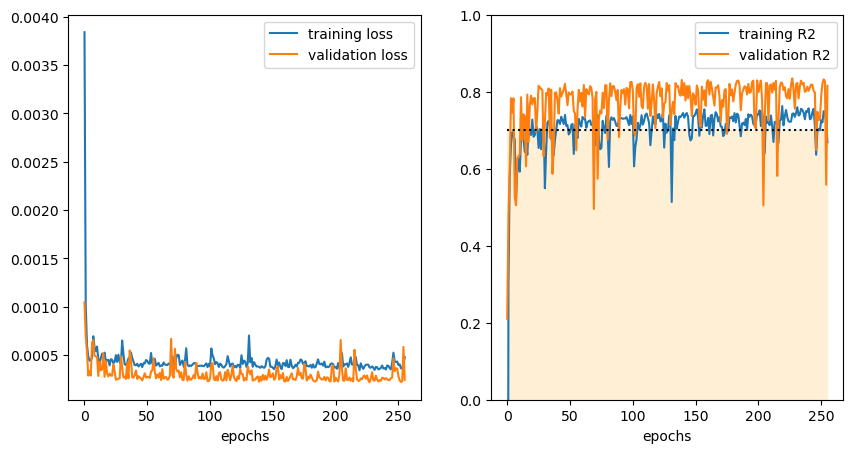

In [88]:
rundNN.show_learning_plots(rundhist)

In [89]:
rundNN.evaluate(rundxnn_test, rundynn_test, rundNNmodel)

5/5 - 0s - loss: 2.4456e-04 - r_square: 0.8154 - 23ms/epoch - 5ms/step


## angular

### Linerar Model

In [90]:
eckig[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,2326.000000,9.000000,0.0,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000
mean,2738.012038,42.222222,NaN,0.275211,0.374372,0.106568,0.364962,3.332963,859.888139
std,2386.941172,10.639288,NaN,0.069810,0.141073,0.056358,0.259287,1.007934,610.778334
min,1.000000,20.000000,NaN,0.100000,0.150000,0.015000,0.030975,2.060000,111.891000
25%,1100.000000,40.000000,NaN,0.220000,0.300000,0.072600,0.201338,2.660000,504.920250
50%,2018.500000,45.000000,NaN,0.300000,0.300000,0.090000,0.300600,3.100000,701.288633
75%,3638.250000,50.000000,NaN,0.300000,0.500000,0.132000,0.432900,3.570000,975.247275
max,15000.000000,50.000000,NaN,0.600000,1.000000,0.360000,2.635500,9.140000,6551.896000


In [91]:
eckigx = eckig[["Nd", "A", "V", "l"]]
eckigy = eckig[["Stückpreis"]]

In [92]:
eckigx_train, eckigx_test, eckigy_train, eckigy_test = cas.create_test_train_set(eckigx, eckigy)

In [93]:
eckigLM = cas.LinearModel()
eckigLMmodel = eckigLM.linear_model(eckigx_train, eckigy_train)
print("MSE:")
print(f"{eckigLM.mse(eckigx_train, eckigy_train, eckigLMmodel):0.0f}")
print(f"{eckigLM.mse(eckigx_test, eckigy_test, eckigLMmodel):0.0f}")
print("\nR2:")
print(f"{eckigLM.r2(eckigx_train, eckigy_train, eckigLMmodel):0.4f}")
print(f"{eckigLM.r2(eckigx_test, eckigy_test, eckigLMmodel):0.4f}")

MSE:
340
314

R2:
0.6986
0.7012


### Neural Network

In [94]:
eckigxnn = eckigx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
eckigynn = eckigy.mul({"Stückpreis": 1/10000})

In [95]:
eckigxnn_train, eckigxnn_test, eckigynn_train, eckigynn_test = cas.create_test_train_set(eckigxnn, eckigynn)

In [96]:
eckigNN = cas.NeuralNetwork()
eckigNNmodel = eckigNN.creat_network(4)

In [97]:
eckighist = eckigNN.fit_model(eckigNNmodel, eckigxnn_train, eckigynn_train, eckigxnn_test, eckigynn_test)

Epoch 1/256
59/59 [==============================] - 1s 4ms/step - loss: 0.0049 - r_square: -0.2991 - val_loss: 0.0014 - val_r_square: 0.6050
Epoch 2/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6846 - val_loss: 0.0018 - val_r_square: 0.5165
Epoch 3/256
59/59 [==============================] - 0s 2ms/step - loss: 8.5962e-04 - r_square: 0.7707 - val_loss: 7.7029e-04 - val_r_square: 0.7888
Epoch 4/256
59/59 [==============================] - 0s 2ms/step - loss: 8.0869e-04 - r_square: 0.7843 - val_loss: 6.3946e-04 - val_r_square: 0.8247
Epoch 5/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7253 - val_loss: 0.0014 - val_r_square: 0.6048
Epoch 6/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7086 - val_loss: 8.4470e-04 - val_r_square: 0.7684
Epoch 7/256
59/59 [==============================] - 0s 2ms/step - loss: 8.4895e-04 - r_square: 0.7736 - val_loss: 8.6664e-04 - val_r

Epoch 56/256
59/59 [==============================] - 0s 2ms/step - loss: 8.9564e-04 - r_square: 0.7611 - val_loss: 6.5904e-04 - val_r_square: 0.8193
Epoch 57/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6679 - val_loss: 8.7891e-04 - val_r_square: 0.7591
Epoch 58/256
59/59 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6656 - val_loss: 0.0011 - val_r_square: 0.7109
Epoch 59/256
59/59 [==============================] - 0s 2ms/step - loss: 8.1895e-04 - r_square: 0.7816 - val_loss: 7.5015e-04 - val_r_square: 0.7944
Epoch 60/256
59/59 [==============================] - 0s 2ms/step - loss: 8.8901e-04 - r_square: 0.7629 - val_loss: 7.2974e-04 - val_r_square: 0.8000
Epoch 61/256
59/59 [==============================] - 0s 2ms/step - loss: 7.9221e-04 - r_square: 0.7887 - val_loss: 6.1733e-04 - val_r_square: 0.8308
Epoch 62/256
59/59 [==============================] - 0s 2ms/step - loss: 6.9462e-04 - r_square: 0.8147 - val_lo

Epoch 111/256
59/59 [==============================] - 0s 2ms/step - loss: 7.0027e-04 - r_square: 0.8132 - val_loss: 6.6818e-04 - val_r_square: 0.8168
Epoch 112/256
59/59 [==============================] - 0s 2ms/step - loss: 7.2326e-04 - r_square: 0.8071 - val_loss: 9.4796e-04 - val_r_square: 0.7401
Epoch 113/256
59/59 [==============================] - 0s 2ms/step - loss: 9.6020e-04 - r_square: 0.7439 - val_loss: 6.2926e-04 - val_r_square: 0.8275
Epoch 114/256
59/59 [==============================] - 0s 2ms/step - loss: 6.0735e-04 - r_square: 0.8380 - val_loss: 5.3052e-04 - val_r_square: 0.8546
Epoch 115/256
59/59 [==============================] - 0s 2ms/step - loss: 6.2169e-04 - r_square: 0.8342 - val_loss: 6.7514e-04 - val_r_square: 0.8149
Epoch 116/256
59/59 [==============================] - 0s 2ms/step - loss: 6.8547e-04 - r_square: 0.8172 - val_loss: 5.6803e-04 - val_r_square: 0.8443
Epoch 117/256
59/59 [==============================] - 0s 2ms/step - loss: 7.1223e-04 - r_squa

59/59 [==============================] - 0s 2ms/step - loss: 6.1485e-04 - r_square: 0.8360 - val_loss: 5.4433e-04 - val_r_square: 0.8508
Epoch 166/256
59/59 [==============================] - 0s 2ms/step - loss: 5.9689e-04 - r_square: 0.8408 - val_loss: 8.2008e-04 - val_r_square: 0.7752
Epoch 167/256
59/59 [==============================] - 0s 2ms/step - loss: 6.2692e-04 - r_square: 0.8328 - val_loss: 5.7501e-04 - val_r_square: 0.8424
Epoch 168/256
59/59 [==============================] - 0s 2ms/step - loss: 6.0101e-04 - r_square: 0.8397 - val_loss: 5.1422e-04 - val_r_square: 0.8590
Epoch 169/256
59/59 [==============================] - 0s 2ms/step - loss: 5.5478e-04 - r_square: 0.8520 - val_loss: 5.5004e-04 - val_r_square: 0.8492
Epoch 170/256
59/59 [==============================] - 0s 2ms/step - loss: 5.4250e-04 - r_square: 0.8553 - val_loss: 5.5410e-04 - val_r_square: 0.8481
Epoch 171/256
59/59 [==============================] - 0s 2ms/step - loss: 5.5671e-04 - r_square: 0.8515 - v

59/59 [==============================] - 0s 2ms/step - loss: 5.7698e-04 - r_square: 0.8461 - val_loss: 5.2738e-04 - val_r_square: 0.8554
Epoch 220/256
59/59 [==============================] - 0s 2ms/step - loss: 5.4919e-04 - r_square: 0.8535 - val_loss: 5.5016e-04 - val_r_square: 0.8492
Epoch 221/256
59/59 [==============================] - 0s 2ms/step - loss: 6.0631e-04 - r_square: 0.8383 - val_loss: 4.6213e-04 - val_r_square: 0.8733
Epoch 222/256
59/59 [==============================] - 0s 2ms/step - loss: 6.5871e-04 - r_square: 0.8243 - val_loss: 5.0793e-04 - val_r_square: 0.8608
Epoch 223/256
59/59 [==============================] - 0s 2ms/step - loss: 5.6244e-04 - r_square: 0.8500 - val_loss: 4.9430e-04 - val_r_square: 0.8645
Epoch 224/256
59/59 [==============================] - 0s 2ms/step - loss: 5.4090e-04 - r_square: 0.8557 - val_loss: 5.7529e-04 - val_r_square: 0.8423
Epoch 225/256
59/59 [==============================] - 0s 2ms/step - loss: 5.6567e-04 - r_square: 0.8491 - v

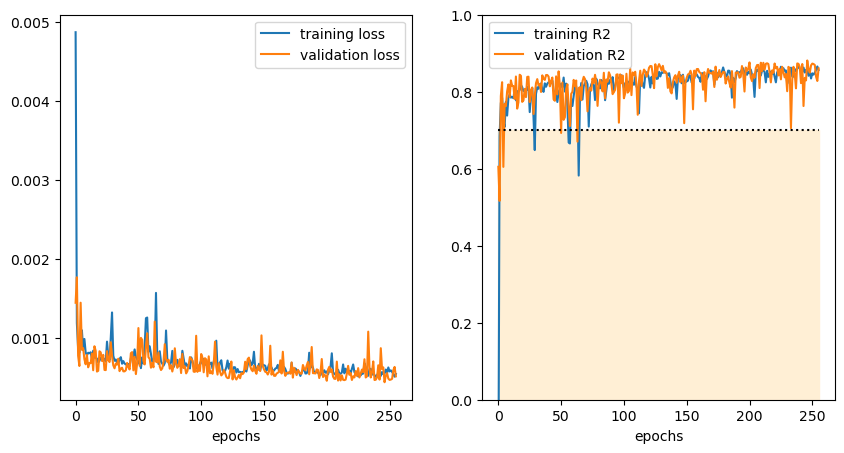

In [98]:
eckigNN.show_learning_plots(eckighist)

In [99]:
eckigNN.evaluate(eckigxnn_test, eckigynn_test, eckigNNmodel)

15/15 - 0s - loss: 5.0828e-04 - r_square: 0.8607 - 32ms/epoch - 2ms/step


## oval

### Linear Model

In [100]:
oval[["Nd", "Md", "d", "a", "b", "A", "V", "l", "Stückpreis"]].describe()

,Nd,Md,d,a,b,A,V,l,Stückpreis
count,252.000000,0.0,0.0,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,4971.337302,NaN,NaN,0.28504,0.559405,0.163497,0.598060,3.819456,1357.206119
std,2622.519694,NaN,NaN,0.05835,0.149493,0.069648,0.261164,1.556533,931.750136
min,500.000000,NaN,NaN,0.20000,0.300000,0.080000,0.195200,2.440000,323.817000
25%,2900.000000,NaN,NaN,0.27000,0.480000,0.125000,0.369000,2.500000,712.765000
50%,4474.500000,NaN,NaN,0.27000,0.500000,0.129600,0.600000,2.900000,1054.345500
75%,6714.250000,NaN,NaN,0.30000,0.750000,0.240000,0.798336,5.930000,1565.850000
max,12300.000000,NaN,NaN,0.50000,0.900000,0.375000,1.139820,6.280000,4174.651000


In [101]:
ovalx = sb_oval[["Nd", "A", "V", "l"]]
ovaly = sb_oval[["Stückpreis"]]

In [102]:
ovalx_train, ovalx_test, ovaly_train, ovaly_test = cas.create_test_train_set(ovalx, ovaly)

In [103]:
ovalLM = cas.LinearModel()
ovalLMmodel = ovalLM.linear_model(ovalx_train, ovaly_train)
print("MSE:")
print(f"{ovalLM.mse(ovalx_train, ovaly_train, ovalLMmodel):0.0f}")
print(f"{ovalLM.mse(ovalx_test, ovaly_test, ovalLMmodel):0.0f}")
print("\nR2:")
print(f"{ovalLM.r2(ovalx_train, ovaly_train, ovalLMmodel):0.4f}")
print(f"{ovalLM.r2(ovalx_test, ovaly_test, ovalLMmodel):0.4f}")

MSE:
417
456

R2:
0.8005
0.7435


### Neural Network

In [104]:
ovalxnn = ovalx.mul({"Nd": 1/10000, "A": 10, "l": 1/10, "V": 1})
ovalynn = ovaly.mul({"Stückpreis": 1/10000})

In [105]:
ovalxnn_train, ovalxnn_test, ovalynn_train, ovalynn_test = cas.create_test_train_set(ovalxnn, ovalynn)

In [106]:
ovalNN = cas.NeuralNetwork()
ovalNNmodel = ovalNN.creat_network(4)

In [107]:
ovalhist = ovalNN.fit_model(ovalNNmodel, ovalxnn_train, ovalynn_train, ovalxnn_test, ovalynn_test)

Epoch 1/256
7/7 [==============================] - 0s 23ms/step - loss: 0.1888 - r_square: -22.4254 - val_loss: 0.0112 - val_r_square: -0.0211
Epoch 2/256
7/7 [==============================] - 0s 7ms/step - loss: 0.0136 - r_square: -0.6867 - val_loss: 0.0144 - val_r_square: -0.3103
Epoch 3/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0086 - r_square: -0.0708 - val_loss: 0.0073 - val_r_square: 0.3380
Epoch 4/256
7/7 [==============================] - 0s 9ms/step - loss: 0.0039 - r_square: 0.5144 - val_loss: 0.0036 - val_r_square: 0.6717
Epoch 5/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0022 - r_square: 0.7332 - val_loss: 0.0027 - val_r_square: 0.7531
Epoch 6/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0016 - r_square: 0.8057 - val_loss: 0.0028 - val_r_square: 0.7452
Epoch 7/256
7/7 [==============================] - 0s 8ms/step - loss: 0.0014 - r_square: 0.8315 - val_loss: 0.0025 - val_r_square: 0.7723
Epoch 8/256
7/7 [===

7/7 [==============================] - 0s 8ms/step - loss: 5.8362e-04 - r_square: 0.9276 - val_loss: 0.0029 - val_r_square: 0.7346
Epoch 59/256
7/7 [==============================] - 0s 7ms/step - loss: 4.6810e-04 - r_square: 0.9419 - val_loss: 0.0021 - val_r_square: 0.8079
Epoch 60/256
7/7 [==============================] - 0s 8ms/step - loss: 3.7158e-04 - r_square: 0.9539 - val_loss: 0.0022 - val_r_square: 0.7954
Epoch 61/256
7/7 [==============================] - 0s 9ms/step - loss: 3.6729e-04 - r_square: 0.9544 - val_loss: 0.0025 - val_r_square: 0.7729
Epoch 62/256
7/7 [==============================] - 0s 8ms/step - loss: 4.2118e-04 - r_square: 0.9477 - val_loss: 0.0017 - val_r_square: 0.8451
Epoch 63/256
7/7 [==============================] - 0s 8ms/step - loss: 3.9031e-04 - r_square: 0.9516 - val_loss: 0.0024 - val_r_square: 0.7844
Epoch 64/256
7/7 [==============================] - 0s 8ms/step - loss: 4.0940e-04 - r_square: 0.9492 - val_loss: 0.0025 - val_r_square: 0.7760
Epoch

Epoch 115/256
7/7 [==============================] - 0s 8ms/step - loss: 4.0316e-04 - r_square: 0.9500 - val_loss: 0.0023 - val_r_square: 0.7882
Epoch 116/256
7/7 [==============================] - 0s 9ms/step - loss: 4.6088e-04 - r_square: 0.9428 - val_loss: 0.0032 - val_r_square: 0.7053
Epoch 117/256
7/7 [==============================] - 0s 9ms/step - loss: 5.0955e-04 - r_square: 0.9368 - val_loss: 0.0034 - val_r_square: 0.6854
Epoch 118/256
7/7 [==============================] - 0s 8ms/step - loss: 7.2815e-04 - r_square: 0.9097 - val_loss: 0.0019 - val_r_square: 0.8222
Epoch 119/256
7/7 [==============================] - 0s 7ms/step - loss: 6.0417e-04 - r_square: 0.9250 - val_loss: 0.0014 - val_r_square: 0.8679
Epoch 120/256
7/7 [==============================] - 0s 8ms/step - loss: 5.9527e-04 - r_square: 0.9261 - val_loss: 0.0016 - val_r_square: 0.8571
Epoch 121/256
7/7 [==============================] - 0s 8ms/step - loss: 3.9911e-04 - r_square: 0.9505 - val_loss: 0.0014 - val_r_

7/7 [==============================] - 0s 9ms/step - loss: 2.7940e-04 - r_square: 0.9653 - val_loss: 0.0014 - val_r_square: 0.8735
Epoch 172/256
7/7 [==============================] - 0s 8ms/step - loss: 3.4249e-04 - r_square: 0.9575 - val_loss: 0.0016 - val_r_square: 0.8565
Epoch 173/256
7/7 [==============================] - 0s 8ms/step - loss: 2.8775e-04 - r_square: 0.9643 - val_loss: 0.0022 - val_r_square: 0.8017
Epoch 174/256
7/7 [==============================] - 0s 9ms/step - loss: 3.1820e-04 - r_square: 0.9605 - val_loss: 0.0011 - val_r_square: 0.8982
Epoch 175/256
7/7 [==============================] - 0s 8ms/step - loss: 4.1154e-04 - r_square: 0.9489 - val_loss: 0.0012 - val_r_square: 0.8863
Epoch 176/256
7/7 [==============================] - 0s 8ms/step - loss: 3.1181e-04 - r_square: 0.9613 - val_loss: 0.0017 - val_r_square: 0.8482
Epoch 177/256
7/7 [==============================] - 0s 8ms/step - loss: 3.0222e-04 - r_square: 0.9625 - val_loss: 0.0020 - val_r_square: 0.8165

7/7 [==============================] - 0s 8ms/step - loss: 3.2707e-04 - r_square: 0.9594 - val_loss: 0.0022 - val_r_square: 0.8014
Epoch 228/256
7/7 [==============================] - 0s 8ms/step - loss: 3.5908e-04 - r_square: 0.9554 - val_loss: 0.0025 - val_r_square: 0.7711
Epoch 229/256
7/7 [==============================] - 0s 8ms/step - loss: 5.7890e-04 - r_square: 0.9282 - val_loss: 0.0017 - val_r_square: 0.8494
Epoch 230/256
7/7 [==============================] - 0s 9ms/step - loss: 4.5060e-04 - r_square: 0.9441 - val_loss: 0.0011 - val_r_square: 0.8996
Epoch 231/256
7/7 [==============================] - 0s 8ms/step - loss: 3.8693e-04 - r_square: 0.9520 - val_loss: 0.0014 - val_r_square: 0.8754
Epoch 232/256
7/7 [==============================] - 0s 8ms/step - loss: 7.7274e-04 - r_square: 0.9041 - val_loss: 0.0031 - val_r_square: 0.7188
Epoch 233/256
7/7 [==============================] - 0s 9ms/step - loss: 5.6073e-04 - r_square: 0.9304 - val_loss: 0.0022 - val_r_square: 0.7996

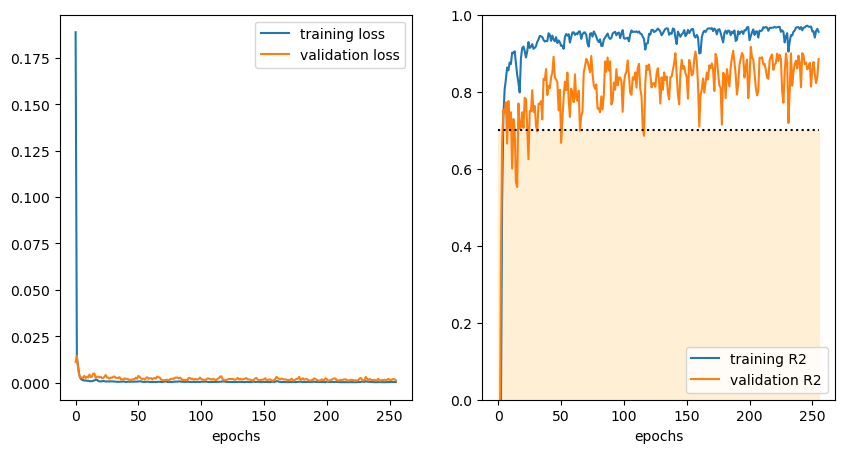

In [108]:
ovalNN.show_learning_plots(ovalhist)

In [109]:
ovalNN.evaluate(ovalxnn_test, ovalynn_test, ovalNNmodel)

2/2 - 0s - loss: 0.0013 - r_square: 0.8849 - 21ms/epoch - 10ms/step


# Principal Component Analysis (PCA)


## all data, no filtering

### Preparing the data

In [110]:
from sklearn.decomposition import PCA


In [111]:
df_pca = df

df_pca = df.drop(["Datum", "Stückpreis", "Ort", "Projektname", "Bezeichnung", "Einkauf_Baumeister",
                 "Baumeister", "Rabatt inkl. Skonto Baumeister", "Baumeister inkl. Rabatt & Teuerung", 
                 "Bemerkungen", "Einkauf_LoMa", "Rabatt inkl. Skonto LoMa", "Teuerung", "Hersteller", "CHF/m3",
                 "LoMa", "Transport", "Total Preis",], axis=1)

df_pca = df_pca.fillna(0, inplace=False)

df_pca = df_pca.replace(to_replace=["x", "X"], value=[1, 1])

pcax_train, pcax_test, pcay_train, pcay_test = cas.create_test_train_set(df_pca, df["Stückpreis"])

# df_pca.info()
pcax_train

,Stahlbetonstütze,Stahlbetonverbundstütze,rund,eckig,oval,d,a,b,l,Nd,Md,Stück,A,V,N/mm2
1980,0,1,1,0,0,0.159,0.00,0.00,2.59,870,0.0,5,0.019856,0.051426,43.816242
2294,1,0,0,1,0,0.000,0.40,0.40,3.80,3300,0.0,1,0.160000,0.608000,20.625000
987,1,0,0,1,0,0.000,0.20,0.35,2.50,2620,0.0,3,0.070000,0.175000,37.428571
1370,1,0,0,1,0,0.000,0.30,0.30,2.85,700,0.0,1,0.090000,0.256500,7.777778
2077,1,0,0,1,0,0.000,0.20,0.20,2.86,400,0.0,1,0.040000,0.114400,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1,0,0,1,0,0.000,0.30,0.50,2.80,6900,0.0,38,0.150000,0.420000,46.000000
836,1,0,1,0,0,0.300,0.00,0.00,2.50,1700,0.0,6,0.070686,0.176715,24.050080
909,1,0,0,1,0,0.000,0.40,0.60,2.72,4100,0.0,4,0.240000,0.652800,17.083333
2189,1,0,0,1,0,0.000,0.42,0.42,3.78,3600,0.0,1,0.176400,0.666792,20.408163


### PCA

In [112]:
pca0 = PCA() 
pca0.fit(pcax_train)

PCA()

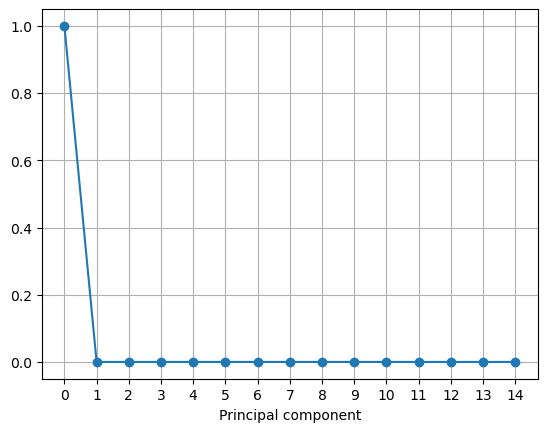

In [113]:
plt.plot(pca0.explained_variance_ratio_,'-o')
plt.xlabel("Principal component")
plt.xticks(range(0, pcax_train.shape[1]))
plt.grid()

In [114]:
dfv = pd.DataFrame(pca0.components_.transpose(), 
                  columns = [f'V_{i+0}' for i in range(len(pcax_train.columns))], 
                  index=pcax_train.columns)
dfv

,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14
Stahlbetonstütze,0.000013,-0.004679,0.000571,0.000933,0.015766,-0.058981,0.034296,-0.701095,0.050123,0.005006,-0.005271,-1.653677e-02,0.025372,0.007549,-7.071068e-01
Stahlbetonverbundstütze,-0.000013,0.004679,-0.000571,-0.000933,-0.015766,0.058981,-0.034296,0.701095,-0.050123,-0.005006,0.005271,1.653677e-02,-0.025372,-0.007549,-7.071068e-01
rund,-0.000027,0.011283,0.004111,0.001993,-0.018977,0.576781,-0.471107,-0.037818,0.368751,-0.473201,0.090045,-1.243456e-01,0.212742,0.121312,-5.154892e-13
eckig,-0.000005,-0.008902,-0.003058,-0.001731,-0.013556,-0.748322,-0.334333,0.052355,0.119577,-0.407272,0.187149,2.476574e-01,0.167739,0.143369,-8.160525e-13
oval,0.000031,-0.002465,-0.000077,-0.001921,0.028471,0.136541,0.759955,0.025978,0.048259,-0.457219,0.284271,2.509680e-01,0.165688,0.140370,-5.711507e-13
d,-0.000004,0.002461,0.001295,0.000476,-0.001728,0.158560,-0.143763,-0.057880,0.082357,-0.113264,0.116898,6.188644e-01,-0.645536,-0.343283,1.501147e-12
a,0.000020,-0.004505,-0.000684,-0.001401,0.012759,-0.155254,0.080855,0.020693,0.140754,-0.134958,0.542670,-6.397220e-01,-0.375499,-0.293232,2.024520e-12
b,0.000038,-0.008108,-0.001253,0.000759,0.000273,-0.179304,0.236128,0.070170,0.614851,-0.180394,-0.652422,-1.371944e-01,-0.152127,-0.170002,3.605568e-13
l,0.000067,-0.003950,-0.003386,-0.019752,0.989206,0.002122,-0.042955,0.013349,-0.085147,-0.078892,-0.062069,-2.586035e-02,-0.031090,0.007981,-3.434156e-15
Nd,0.999990,-0.004488,0.000238,0.000008,-0.000100,0.000091,-0.000082,0.000029,-0.000093,-0.000040,-0.000016,-8.985203e-07,0.000008,-0.000002,-2.220446e-16


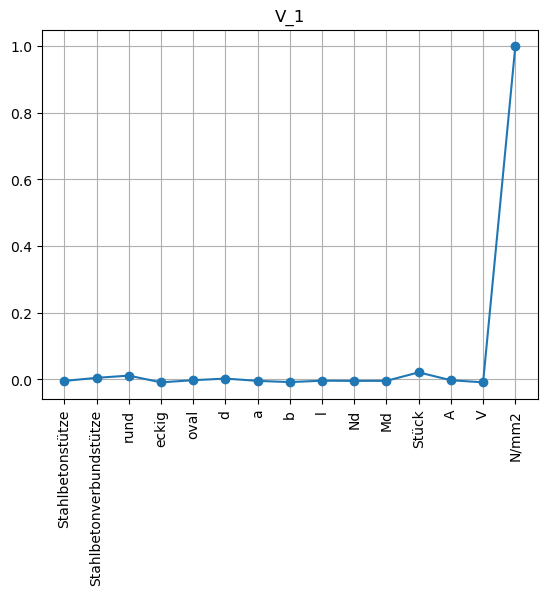

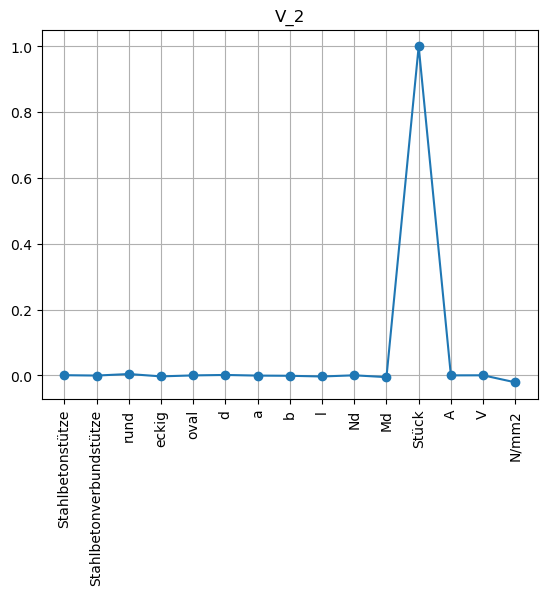

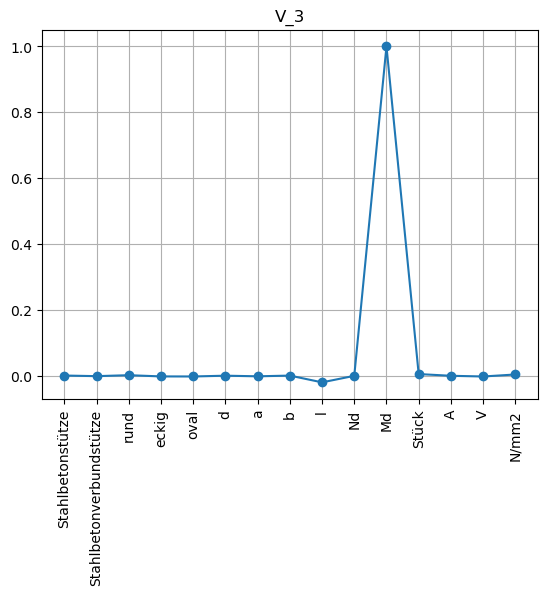

In [115]:
for vector in ['V_1','V_2','V_3']:
    plt.figure()
    plt.title(vector)
    plt.plot(np.arange(len(pcax_train.columns)),list(dfv[vector]),'-o')
    _=plt.xticks(np.arange(len(pcax_train.columns)),pcax_train.columns, rotation=90)
    plt.grid()

### Reducing features

In [116]:
pca = PCA(n_components = 2) 
pca.fit_transform(pcax_train)
pcax_train_transformed = pca.fit_transform(pcax_train)
pcax_test_transformed = pca.transform(pcax_test)

In [117]:
print(f"{np.sum(pca.explained_variance_ratio_[:2]):0.6f}")

0.999986


### Linear Model

In [118]:
pcaLM = cas.LinearModel()
pcaLMmodel = pcaLM.linear_model(pcax_train_transformed, pcay_train)
print("MSE:")
print(f"Train: {np.std(pcay_train - pcaLMmodel.predict(pcax_train_transformed)):0.0f}")
print(f"Test: {np.std(pcay_test - pcaLMmodel.predict(pcax_test_transformed)):0.0f}")
print("\nR2:")
print(f"Train: {pcaLM.r2(pcax_train_transformed, pcay_train, pcaLMmodel):0.4f}")
print(f"Test: {pcaLM.r2(pcax_test_transformed, pcay_test, pcaLMmodel):0.4f}")


MSE:
Train: 512
Test: 472

R2:
Train: 0.3301
Test: 0.2862


#### Numbe of Components = n

In [119]:
n = 4

pcaB = PCA(n_components = n) 
pcaB.fit_transform(pcax_train)
pcax_train_transformedB = pcaB.fit_transform(pcax_train)
pcax_test_transformedB = pcaB.transform(pcax_test)

In [120]:
print(f"{np.sum(pcaB.explained_variance_ratio_[:n]):0.6f}")

1.000000


In [121]:
pcaLMB = cas.LinearModel()
pcaLMmodelB = pcaLMB.linear_model(pcax_train_transformedB, pcay_train)
print("MSE:")
print(f"{np.std(pcay_train - pcaLMmodelB.predict(pcax_train_transformedB)):0.0f}")
print(f"{np.std(pcay_test - pcaLMmodelB.predict(pcax_test_transformedB)):0.0f}")
print("\nR2:")
print(f"{pcaLM.r2(pcax_train_transformedB, pcay_train, pcaLMmodelB):0.4f}")
print(f"{pcaLM.r2(pcax_test_transformedB, pcay_test, pcaLMmodelB):0.4f}")

MSE:
511
479

R2:
0.3343
0.2673


### Neural Network

- scaling values

In [122]:
from sklearn.preprocessing import StandardScaler


s = StandardScaler()
s.fit(pcax_train_transformed)
pcax_train_transformed_scaled = s.transform(pcax_train_transformed)
pcax_test_transformed_scaled = s.transform(pcax_test_transformed)



- create Neural Network

In [123]:
pcaNN = cas.NeuralNetwork()
pcaNNmodel = pcaNN.creat_network(2)

- fitting

In [124]:
pcahist = pcaNN.fit_model(pcaNNmodel, 
                          pcax_train_transformed_scaled, 
                          pcay_train/10000, 
                          pcax_test_transformed_scaled, 
                          pcay_test/10000, 
                          epoch=512)

Epoch 1/512
85/85 [==============================] - 1s 6ms/step - loss: 0.0039 - r_square: 0.0016 - val_loss: 0.0021 - val_r_square: 0.3385
Epoch 2/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3580 - val_loss: 0.0021 - val_r_square: 0.3301
Epoch 3/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3718 - val_loss: 0.0023 - val_r_square: 0.2560
Epoch 4/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3630 - val_loss: 0.0021 - val_r_square: 0.3250
Epoch 5/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3756 - val_loss: 0.0022 - val_r_square: 0.2838
Epoch 6/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3689 - val_loss: 0.0021 - val_r_square: 0.3433
Epoch 7/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3684 - val_loss: 0.0022 - val_r_square: 0.2862
Epoch 8/512
8

Epoch 59/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3629 - val_loss: 0.0021 - val_r_square: 0.3282
Epoch 60/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3915 - val_loss: 0.0022 - val_r_square: 0.2881
Epoch 61/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3919 - val_loss: 0.0023 - val_r_square: 0.2812
Epoch 62/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3736 - val_loss: 0.0027 - val_r_square: 0.1332
Epoch 63/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4023 - val_loss: 0.0022 - val_r_square: 0.2929
Epoch 64/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3962 - val_loss: 0.0021 - val_r_square: 0.3395
Epoch 65/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4152 - val_loss: 0.0021 - val_r_square: 0.3272
Epoch 

85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4159 - val_loss: 0.0020 - val_r_square: 0.3538
Epoch 117/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4325 - val_loss: 0.0020 - val_r_square: 0.3671
Epoch 118/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4266 - val_loss: 0.0021 - val_r_square: 0.3139
Epoch 119/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4187 - val_loss: 0.0020 - val_r_square: 0.3525
Epoch 120/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4151 - val_loss: 0.0020 - val_r_square: 0.3668
Epoch 121/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4070 - val_loss: 0.0020 - val_r_square: 0.3459
Epoch 122/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4149 - val_loss: 0.0020 - val_r_square: 0.3723
Epoch 123/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4408 - val_loss: 0.0019 - val_r_square: 0.3801
Epoch 174/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4426 - val_loss: 0.0020 - val_r_square: 0.3627
Epoch 175/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4366 - val_loss: 0.0020 - val_r_square: 0.3582
Epoch 176/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4431 - val_loss: 0.0020 - val_r_square: 0.3553
Epoch 177/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4482 - val_loss: 0.0020 - val_r_square: 0.3676
Epoch 178/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4469 - val_loss: 0.0020 - val_r_square: 0.3475
Epoch 179/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4427 - val_loss: 0.0020 - val_r_square: 0.3661
Epoch 180/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4635 - val_loss: 0.0019 - val_r_square: 0.3898
Epoch 231/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4611 - val_loss: 0.0020 - val_r_square: 0.3767
Epoch 232/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4611 - val_loss: 0.0020 - val_r_square: 0.3771
Epoch 233/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4441 - val_loss: 0.0020 - val_r_square: 0.3773
Epoch 234/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4641 - val_loss: 0.0021 - val_r_square: 0.3368
Epoch 235/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4574 - val_loss: 0.0019 - val_r_square: 0.3883
Epoch 236/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4739 - val_loss: 0.0020 - val_r_square: 0.3767
Epoch 237/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4642 - val_loss: 0.0019 - val_r_square: 0.3945
Epoch 288/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4722 - val_loss: 0.0020 - val_r_square: 0.3523
Epoch 289/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4588 - val_loss: 0.0019 - val_r_square: 0.3935
Epoch 290/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4561 - val_loss: 0.0022 - val_r_square: 0.2952
Epoch 291/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4429 - val_loss: 0.0019 - val_r_square: 0.4011
Epoch 292/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4545 - val_loss: 0.0018 - val_r_square: 0.4108
Epoch 293/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0021 - r_square: 0.4668 - val_loss: 0.0020 - val_r_square: 0.3655
Epoch 294/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5105 - val_loss: 0.0018 - val_r_square: 0.4354
Epoch 345/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5085 - val_loss: 0.0017 - val_r_square: 0.4553
Epoch 346/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4381 - val_loss: 0.0023 - val_r_square: 0.2662
Epoch 347/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3853 - val_loss: 0.0023 - val_r_square: 0.2531
Epoch 348/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3952 - val_loss: 0.0021 - val_r_square: 0.3293
Epoch 349/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4071 - val_loss: 0.0022 - val_r_square: 0.2829
Epoch 350/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4072 - val_loss: 0.0021 - val_r_square: 0.3244
Epoch 351/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4253 - val_loss: 0.0020 - val_r_square: 0.3741
Epoch 402/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4432 - val_loss: 0.0021 - val_r_square: 0.3358
Epoch 403/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4266 - val_loss: 0.0020 - val_r_square: 0.3653
Epoch 404/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4324 - val_loss: 0.0020 - val_r_square: 0.3667
Epoch 405/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4480 - val_loss: 0.0021 - val_r_square: 0.3334
Epoch 406/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4385 - val_loss: 0.0025 - val_r_square: 0.2096
Epoch 407/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4263 - val_loss: 0.0019 - val_r_square: 0.3820
Epoch 408/512

85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4784 - val_loss: 0.0018 - val_r_square: 0.4245
Epoch 459/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4953 - val_loss: 0.0017 - val_r_square: 0.4415
Epoch 460/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4826 - val_loss: 0.0018 - val_r_square: 0.4173
Epoch 461/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5029 - val_loss: 0.0018 - val_r_square: 0.4326
Epoch 462/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4939 - val_loss: 0.0019 - val_r_square: 0.3967
Epoch 463/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4880 - val_loss: 0.0020 - val_r_square: 0.3523
Epoch 464/512
85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5106 - val_loss: 0.0019 - val_r_square: 0.3778
Epoch 465/512

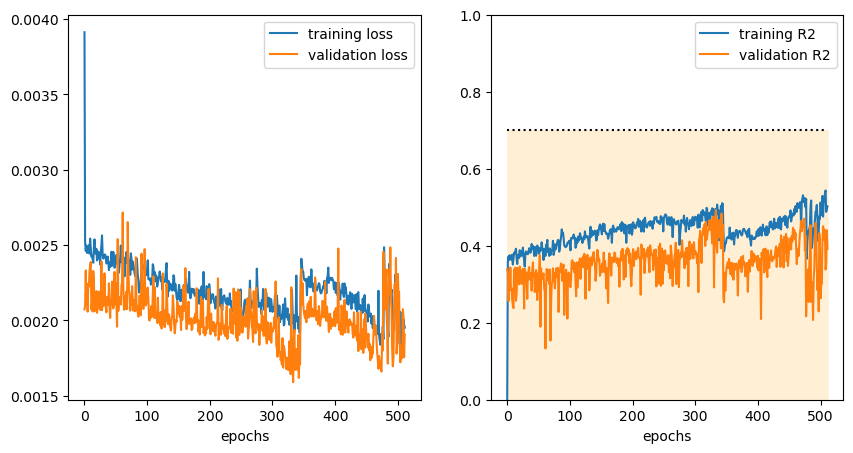

In [125]:
pcaNN.show_learning_plots(pcahist)

- evaluate

In [126]:
pcaNN.evaluate(pcax_test_transformed_scaled, pcay_test/10000, pcaNNmodel)

22/22 - 0s - loss: 0.0019 - r_square: 0.3914 - 39ms/epoch - 2ms/step


- predicting

In [127]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 0 to 3446
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stahlbetonstütze         3379 non-null   int64  
 1   Stahlbetonverbundstütze  3379 non-null   int64  
 2   rund                     3379 non-null   int64  
 3   eckig                    3379 non-null   int64  
 4   oval                     3379 non-null   int64  
 5   d                        3379 non-null   float64
 6   a                        3379 non-null   float64
 7   b                        3379 non-null   float64
 8   l                        3379 non-null   float64
 9   Nd                       3379 non-null   int64  
 10  Md                       3379 non-null   float64
 11  Stück                    3379 non-null   int64  
 12  A                        3379 non-null   float64
 13  V                        3379 non-null   float64
 14  N/mm2                   

In [128]:
Stahlbetonstütze = 1
Stahlbetonverbundstütze = 0  
rund = 0
eckig = 1
oval = 0
d = 0
a = 0.25
b = 0.25
l = 3.0
Nd = 2000
Md = 0
Stück = 1
# LoMa = 1
# Transport = 10
A = a * b
V = A * l
N_mm2 = Nd*1000/(A*100*100*100)


In [129]:
xpre = np.array([[Stahlbetonstütze, Stahlbetonverbundstütze, rund, eckig, oval, d, a, b, l, Nd, Md, Stück,
                 A, V, N_mm2]])

xpre_transformed = pca.transform(xpre)

pre = s.transform(xpre_transformed)

ypre = pcaNN.predict(pcaNNmodel, pre)


"""
print(xpre)
print(xpre_transformed)
print(pre)
"""

print(f"{ypre[0][0]*10000:0.0f}")

1/1 [==============================] - 0s 78ms/step
743


In [143]:
import tensorflow as tf
import tensorflow_addons as tfa

class NeuralNetwork:
    """
    Provide all the necessary moduls to work with the neural network
    """

    def creat_network(self, input_shape: int) -> tf.keras.models.Sequential:
        """
        Create the neural network model and define the training
        (loss function, metrics)

        :param input_shape: Number of input variables
        :return: neural network object
        """

        # create the model
        model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(input_shape,)),  # input shape
            # 1. layer: number of neurons, activations function relu
            tf.keras.layers.Dense(128, activation='relu'),
            # 2. layer
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='sigmoid'),
            tf.keras.layers.Dense(64, activation='sigmoid'),
            tf.keras.layers.Dense(32, activation='sigmoid'),
            # last layer has 1 neuron and no activation function as we're
            # looking for a number value
            tf.keras.layers.Dense(1, activation=None)])

        # Train the model
        # how we are going to train
        # learning_rate: steps the model maks when it's learning?
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='mse',  # what loss function to use
                      metrics=[tfa.metrics.r_square.RSquare()])  # what metrics we want tu use
        # model.summary()
        return model

    def fit_model(self, model,
                  x_train: pd.DataFrame, y_train: pd.DataFrame,
                  x_test: pd.DataFrame, y_test: pd.DataFrame,
                  epoch: int = 256):
        save_path = 'save/col_{epoch}.ckpt'
        save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                                           save_weights_only=True)

        hist = model.fit(x=x_train, y=y_train,  # training data
                         # batchsize 75 epoch with 128 samples
                         epochs=epoch, batch_size=32,
                         validation_data=(x_test, y_test),  # validation
                         callbacks=[
                             save_callback])  # save values wights and bias?

        return hist

    def show_learning_plots(self, hist):
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].plot(hist.epoch, hist.history['loss'])
        axs[0].plot(hist.epoch, hist.history['val_loss'])
        axs[0].legend(('training loss', 'validation loss'), loc='upper right')
        axs[0].set_xlabel("epochs")

        axs[1].plot(hist.epoch, hist.history['r_square'])
        axs[1].plot(hist.epoch, hist.history['val_r_square'])
        axs[1].legend(('training R2', 'validation R2'))  # , loc='upper left')
        axs[1].hlines(y=0.7, xmin=hist.epoch[0], xmax=hist.epoch[-1],  color="black", linestyles="dotted")
        axs[1].fill_between(x=hist.epoch, y1=0, y2=0.7, color="papayawhip")
        axs[1].set_ylim([0, 1])
        axs[1].set_xlabel("epochs")
        plt.show()

    def evaluate(self, x, y, model):
        model.evaluate(x, y, verbose=2)

    def predict(self, model, x):
        return model.predict(x)


In [144]:
pcaNN_ = NeuralNetwork()
pcaNNmodel_ = pcaNN_.creat_network(2)

In [145]:
pcahist_ = pcaNN_.fit_model(pcaNNmodel_, 
                          pcax_train_transformed_scaled, 
                          pcay_train/10000, 
                          pcax_test_transformed_scaled, 
                          pcay_test/10000, 
                          epoch=1028)

Epoch 1/1028
85/85 [==============================] - 1s 3ms/step - loss: 0.0105 - r_square: -1.6780 - val_loss: 0.0028 - val_r_square: 0.1130
Epoch 2/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0026 - r_square: 0.3407 - val_loss: 0.0022 - val_r_square: 0.3105
Epoch 3/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3611 - val_loss: 0.0021 - val_r_square: 0.3201
Epoch 4/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3792 - val_loss: 0.0021 - val_r_square: 0.3420
Epoch 5/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3711 - val_loss: 0.0021 - val_r_square: 0.3296
Epoch 6/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0025 - r_square: 0.3729 - val_loss: 0.0021 - val_r_square: 0.3379
Epoch 7/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0024 - r_square: 0.3914 - val_loss: 0.0021 - val_r_square: 0.3227
Epoch

85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4347 - val_loss: 0.0020 - val_r_square: 0.3480
Epoch 59/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4217 - val_loss: 0.0022 - val_r_square: 0.3047
Epoch 60/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4300 - val_loss: 0.0019 - val_r_square: 0.3879
Epoch 61/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4184 - val_loss: 0.0020 - val_r_square: 0.3511
Epoch 62/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4338 - val_loss: 0.0026 - val_r_square: 0.1555
Epoch 63/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0022 - r_square: 0.4362 - val_loss: 0.0020 - val_r_square: 0.3499
Epoch 64/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4209 - val_loss: 0.0019 - val_r_square: 0.3825
Epoch 65/1028

85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5175 - val_loss: 0.0018 - val_r_square: 0.4264
Epoch 116/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0018 - r_square: 0.5441 - val_loss: 0.0016 - val_r_square: 0.5023
Epoch 117/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - r_square: 0.5710 - val_loss: 0.0015 - val_r_square: 0.5079
Epoch 118/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4833 - val_loss: 0.0022 - val_r_square: 0.3045
Epoch 119/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4769 - val_loss: 0.0019 - val_r_square: 0.3869
Epoch 120/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0020 - r_square: 0.4914 - val_loss: 0.0021 - val_r_square: 0.3430
Epoch 121/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5049 - val_loss: 0.0019 - val_r_square: 0.3991
Epoch 1

Epoch 172/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6362 - val_loss: 0.0013 - val_r_square: 0.5934
Epoch 173/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6437 - val_loss: 0.0014 - val_r_square: 0.5663
Epoch 174/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6488 - val_loss: 0.0016 - val_r_square: 0.4873
Epoch 175/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5218 - val_loss: 0.0016 - val_r_square: 0.4813
Epoch 176/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5953 - val_loss: 0.0016 - val_r_square: 0.4925
Epoch 177/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6358 - val_loss: 0.0013 - val_r_square: 0.5803
Epoch 178/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6313 - val_loss: 0.0015 - val_r_square:

Epoch 229/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5950 - val_loss: 0.0018 - val_r_square: 0.4231
Epoch 230/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0019 - r_square: 0.5075 - val_loss: 0.0017 - val_r_square: 0.4723
Epoch 231/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5810 - val_loss: 0.0015 - val_r_square: 0.5344
Epoch 232/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.6011 - val_loss: 0.0017 - val_r_square: 0.4637
Epoch 233/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6057 - val_loss: 0.0015 - val_r_square: 0.5256
Epoch 234/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5814 - val_loss: 0.0016 - val_r_square: 0.4790
Epoch 235/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - r_square: 0.5788 - val_loss: 0.0017 - val_r_square:

Epoch 286/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6877 - val_loss: 0.0012 - val_r_square: 0.6262
Epoch 287/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6374 - val_loss: 0.0014 - val_r_square: 0.5449
Epoch 288/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6384 - val_loss: 0.0012 - val_r_square: 0.6229
Epoch 289/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7157 - val_loss: 0.0015 - val_r_square: 0.5287
Epoch 290/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6930 - val_loss: 0.0012 - val_r_square: 0.6044
Epoch 291/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7118 - val_loss: 0.0013 - val_r_square: 0.5951
Epoch 292/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6730 - val_loss: 0.0013 - val_r_square:

Epoch 343/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7078 - val_loss: 0.0014 - val_r_square: 0.5622
Epoch 344/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7121 - val_loss: 0.0012 - val_r_square: 0.6202
Epoch 345/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7345 - val_loss: 0.0012 - val_r_square: 0.6287
Epoch 346/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7262 - val_loss: 0.0011 - val_r_square: 0.6368
Epoch 347/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6974 - val_loss: 0.0022 - val_r_square: 0.3046
Epoch 348/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0018 - r_square: 0.5500 - val_loss: 0.0014 - val_r_square: 0.5619
Epoch 349/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6661 - val_loss: 0.0013 - val_r_square:

Epoch 400/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7198 - val_loss: 0.0013 - val_r_square: 0.5761
Epoch 401/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7113 - val_loss: 0.0014 - val_r_square: 0.5550
Epoch 402/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7188 - val_loss: 0.0013 - val_r_square: 0.6005
Epoch 403/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7328 - val_loss: 0.0012 - val_r_square: 0.6277
Epoch 404/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7303 - val_loss: 0.0012 - val_r_square: 0.6194
Epoch 405/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6478 - val_loss: 0.0015 - val_r_square: 0.5274
Epoch 406/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0023 - r_square: 0.4205 - val_loss: 0.0020 - val_r_square:

Epoch 457/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7216 - val_loss: 0.0013 - val_r_square: 0.5921
Epoch 458/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7349 - val_loss: 0.0014 - val_r_square: 0.5482
Epoch 459/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7186 - val_loss: 0.0017 - val_r_square: 0.4644
Epoch 460/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6480 - val_loss: 0.0013 - val_r_square: 0.5741
Epoch 461/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7291 - val_loss: 0.0013 - val_r_square: 0.5810
Epoch 462/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7403 - val_loss: 0.0013 - val_r_square: 0.5912
Epoch 463/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7371 - val_loss: 0.0013 - val_r_square:

85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7210 - val_loss: 0.0014 - val_r_square: 0.5418
Epoch 514/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6504 - val_loss: 0.0012 - val_r_square: 0.6041
Epoch 515/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6403 - val_loss: 0.0013 - val_r_square: 0.5893
Epoch 516/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7158 - val_loss: 0.0014 - val_r_square: 0.5423
Epoch 517/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.7048 - val_loss: 0.0014 - val_r_square: 0.5548
Epoch 518/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7316 - val_loss: 0.0012 - val_r_square: 0.6194
Epoch 519/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.7031e-04 - r_square: 0.7524 - val_loss: 0.0012 - val_r_square: 0.6162
Epo

85/85 [==============================] - 0s 2ms/step - loss: 9.9536e-04 - r_square: 0.7460 - val_loss: 0.0013 - val_r_square: 0.5898
Epoch 570/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.3659e-04 - r_square: 0.7610 - val_loss: 0.0012 - val_r_square: 0.6241
Epoch 571/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7384 - val_loss: 0.0012 - val_r_square: 0.6221
Epoch 572/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6565 - val_loss: 0.0015 - val_r_square: 0.5283
Epoch 573/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6131 - val_loss: 0.0013 - val_r_square: 0.5695
Epoch 574/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7195 - val_loss: 0.0013 - val_r_square: 0.5904
Epoch 575/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.9075e-04 - r_square: 0.7471 - val_loss: 0.0012 - val_r_square: 0.

85/85 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6964 - val_loss: 0.0014 - val_r_square: 0.5482
Epoch 626/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7244 - val_loss: 0.0013 - val_r_square: 0.5722
Epoch 627/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.4591e-04 - r_square: 0.7586 - val_loss: 0.0013 - val_r_square: 0.5936
Epoch 628/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7302 - val_loss: 0.0017 - val_r_square: 0.4518
Epoch 629/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6424 - val_loss: 0.0014 - val_r_square: 0.5455
Epoch 630/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.6676e-04 - r_square: 0.7533 - val_loss: 0.0013 - val_r_square: 0.5946
Epoch 631/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7146 - val_loss: 0.0013 - val_r_square: 0.5880

85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7394 - val_loss: 0.0013 - val_r_square: 0.5733
Epoch 682/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6427 - val_loss: 0.0013 - val_r_square: 0.5720
Epoch 683/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6750 - val_loss: 0.0019 - val_r_square: 0.3902
Epoch 684/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0012 - r_square: 0.6887 - val_loss: 0.0013 - val_r_square: 0.5869
Epoch 685/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7215 - val_loss: 0.0013 - val_r_square: 0.5865
Epoch 686/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7439 - val_loss: 0.0012 - val_r_square: 0.6064
Epoch 687/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.1250e-04 - r_square: 0.7671 - val_loss: 0.0012 - val_r_square: 0.6246
Epo

85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6100 - val_loss: 0.0018 - val_r_square: 0.4329
Epoch 738/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6282 - val_loss: 0.0017 - val_r_square: 0.4620
Epoch 739/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6275 - val_loss: 0.0016 - val_r_square: 0.5045
Epoch 740/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6303 - val_loss: 0.0015 - val_r_square: 0.5067
Epoch 741/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6616 - val_loss: 0.0015 - val_r_square: 0.5267
Epoch 742/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6720 - val_loss: 0.0016 - val_r_square: 0.5043
Epoch 743/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6789 - val_loss: 0.0015 - val_r_square: 0.5060
Epoch 7

Epoch 794/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.6550e-04 - r_square: 0.7536 - val_loss: 0.0014 - val_r_square: 0.5656
Epoch 795/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6540 - val_loss: 0.0013 - val_r_square: 0.5760
Epoch 796/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.8647e-04 - r_square: 0.7482 - val_loss: 0.0015 - val_r_square: 0.5184
Epoch 797/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7229 - val_loss: 0.0012 - val_r_square: 0.6021
Epoch 798/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - r_square: 0.5728 - val_loss: 0.0014 - val_r_square: 0.5568
Epoch 799/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.3350e-04 - r_square: 0.7618 - val_loss: 0.0013 - val_r_square: 0.6004
Epoch 800/1028
85/85 [==============================] - 0s 2ms/step - loss: 8.8316e-04 - r_square: 0.7746 - val_loss: 0.0012

85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6107 - val_loss: 0.0018 - val_r_square: 0.4406
Epoch 851/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6081 - val_loss: 0.0016 - val_r_square: 0.4802
Epoch 852/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6233 - val_loss: 0.0017 - val_r_square: 0.4594
Epoch 853/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6126 - val_loss: 0.0016 - val_r_square: 0.4921
Epoch 854/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6360 - val_loss: 0.0017 - val_r_square: 0.4712
Epoch 855/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6131 - val_loss: 0.0017 - val_r_square: 0.4660
Epoch 856/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0014 - r_square: 0.6341 - val_loss: 0.0016 - val_r_square: 0.5023
Epoch 8

Epoch 907/1028
85/85 [==============================] - 0s 2ms/step - loss: 8.9250e-04 - r_square: 0.7722 - val_loss: 0.0013 - val_r_square: 0.5814
Epoch 908/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0013 - r_square: 0.6701 - val_loss: 0.0017 - val_r_square: 0.4648
Epoch 909/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7209 - val_loss: 0.0013 - val_r_square: 0.5848
Epoch 910/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7395 - val_loss: 0.0024 - val_r_square: 0.2376
Epoch 911/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0018 - r_square: 0.5279 - val_loss: 0.0019 - val_r_square: 0.4012
Epoch 912/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - r_square: 0.5626 - val_loss: 0.0018 - val_r_square: 0.4297
Epoch 913/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6257 - val_loss: 0.0013 - val_r_squ

85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6289 - val_loss: 0.0014 - val_r_square: 0.5593
Epoch 964/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0010 - r_square: 0.7340 - val_loss: 0.0013 - val_r_square: 0.5940
Epoch 965/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.6724e-04 - r_square: 0.7531 - val_loss: 0.0012 - val_r_square: 0.6138
Epoch 966/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7066 - val_loss: 0.0023 - val_r_square: 0.2799
Epoch 967/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0015 - r_square: 0.6179 - val_loss: 0.0015 - val_r_square: 0.5153
Epoch 968/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0011 - r_square: 0.7142 - val_loss: 0.0014 - val_r_square: 0.5688
Epoch 969/1028
85/85 [==============================] - 0s 2ms/step - loss: 9.6483e-04 - r_square: 0.7538 - val_loss: 0.0013 - val_r_square: 0.5899

85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - r_square: 0.5763 - val_loss: 0.0019 - val_r_square: 0.3893
Epoch 1020/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5818 - val_loss: 0.0019 - val_r_square: 0.4017
Epoch 1021/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - r_square: 0.5701 - val_loss: 0.0020 - val_r_square: 0.3615
Epoch 1022/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5871 - val_loss: 0.0020 - val_r_square: 0.3639
Epoch 1023/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0017 - r_square: 0.5749 - val_loss: 0.0020 - val_r_square: 0.3753
Epoch 1024/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5814 - val_loss: 0.0019 - val_r_square: 0.4087
Epoch 1025/1028
85/85 [==============================] - 0s 2ms/step - loss: 0.0016 - r_square: 0.5899 - val_loss: 0.0020 - val_r_square: 0.3602
E

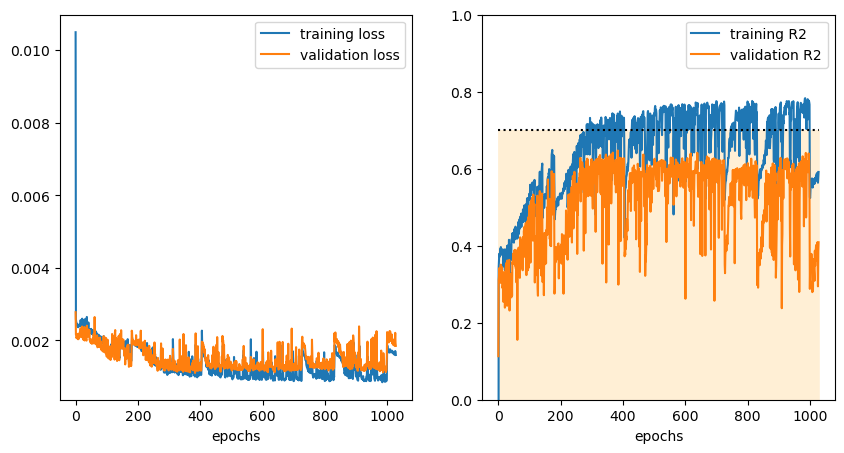

In [146]:
pcaNN_.show_learning_plots(pcahist_)

In [147]:
pcaNN_.evaluate(pcax_test_transformed_scaled, pcay_test/10000, pcaNNmodel_)

22/22 - 0s - loss: 0.0019 - r_square: 0.4089 - 39ms/epoch - 2ms/step
